In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from urllib.request import urlopen
from io import StringIO
import csv

##ML Data Cleaning and Feature Selection

In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

Answer the following questions:

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much? 

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.



In [36]:
df = pd.read_csv("https://raw.githubusercontent.com/Sriram-Northeastern/DataScience/main/cost.csv")

In [35]:
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


What are the data types? (Only numeric and categorical) ?

In [37]:
df.dtypes

food_category                  object
food_department                object
food_family                    object
store_sales(in millions)      float64
store_cost(in millions)       float64
unit_sales(in millions)       float64
promotion_name                 object
sales_country                  object
marital_status                 object
gender                         object
total_children                float64
education                      object
member_card                    object
occupation                     object
houseowner                     object
avg_cars_at home(approx)      float64
avg. yearly_income             object
num_children_at_home          float64
avg_cars_at home(approx).1    float64
brand_name                     object
SRP                           float64
gross_weight                  float64
net_weight                    float64
recyclable_package            float64
low_fat                       float64
units_per_case                float64
store_type  

17 object , 22 float64

In [38]:
df_drop = df.drop(columns=['food_category', 'food_department','food_family','promotion_name','sales_country','marital_status','gender','education','member_card','occupation','houseowner','avg. yearly_income','brand_name','store_type','store_city','store_state','media_type'])

In [39]:
df_drop.dtypes

store_sales(in millions)      float64
store_cost(in millions)       float64
unit_sales(in millions)       float64
total_children                float64
avg_cars_at home(approx)      float64
num_children_at_home          float64
avg_cars_at home(approx).1    float64
SRP                           float64
gross_weight                  float64
net_weight                    float64
recyclable_package            float64
low_fat                       float64
units_per_case                float64
store_sqft                    float64
grocery_sqft                  float64
frozen_sqft                   float64
meat_sqft                     float64
coffee_bar                    float64
video_store                   float64
salad_bar                     float64
prepared_food                 float64
florist                       float64
cost                          float64
dtype: object

17 object , 22 float64

In [6]:
df.isnull().sum()

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

No data is missing

What are the likely distributions of the numeric variables?

In [7]:
df.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [8]:
pd.set_option('max_columns', None)

In [9]:
df1 = df.select_dtypes(include=['float64'])

In [10]:
df1.head(5)

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,7.36,2.7232,4.0,1.0,1.0,1.0,1.0,1.84,19.70,17.70,1.0,0.0,17.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,126.62
1,5.52,2.5944,3.0,0.0,4.0,0.0,4.0,1.84,19.70,17.70,1.0,0.0,17.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,59.86
2,3.68,1.3616,2.0,4.0,1.0,0.0,1.0,1.84,19.70,17.70,1.0,0.0,17.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,84.16
3,3.68,1.1776,2.0,2.0,2.0,2.0,2.0,1.84,19.70,17.70,1.0,0.0,17.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,95.78
4,4.08,1.4280,3.0,0.0,2.0,0.0,2.0,1.36,7.12,5.11,0.0,1.0,29.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,50.79


#What are the likely distributions of the numeric variables?



In [11]:
from statsmodels.graphics.gofplots import qqplot

<Figure size 576x360 with 0 Axes>

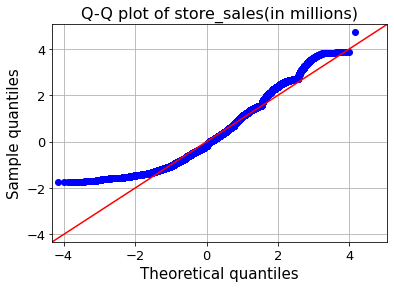

<Figure size 576x360 with 0 Axes>

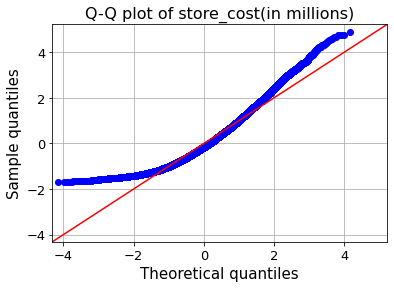

<Figure size 576x360 with 0 Axes>

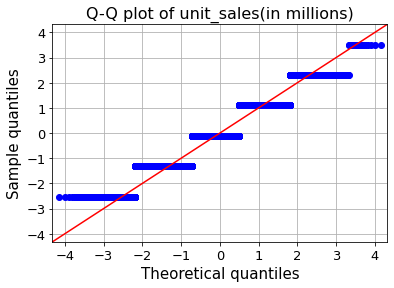

<Figure size 576x360 with 0 Axes>

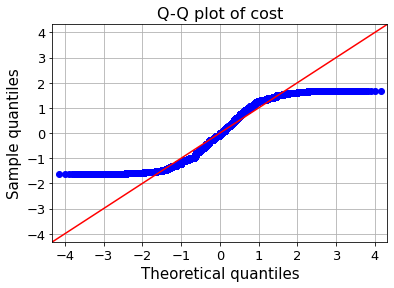

<Figure size 576x360 with 0 Axes>

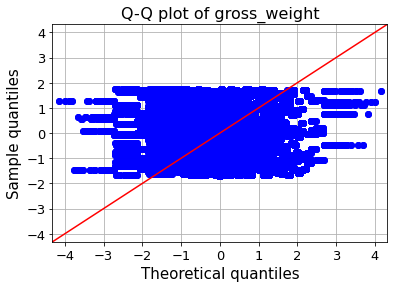

<Figure size 576x360 with 0 Axes>

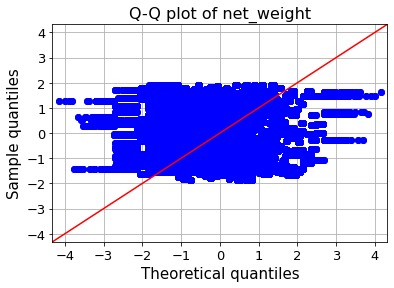

<Figure size 576x360 with 0 Axes>

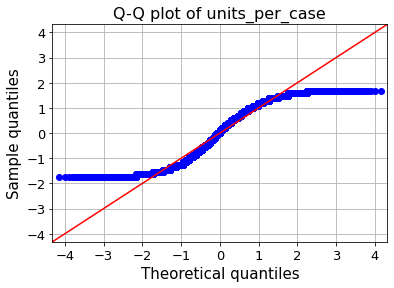

<Figure size 576x360 with 0 Axes>

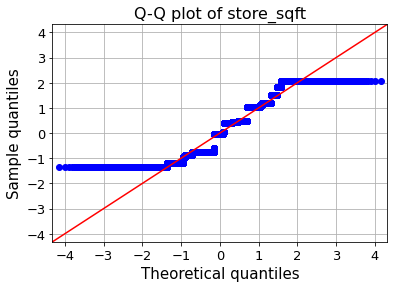

<Figure size 576x360 with 0 Axes>

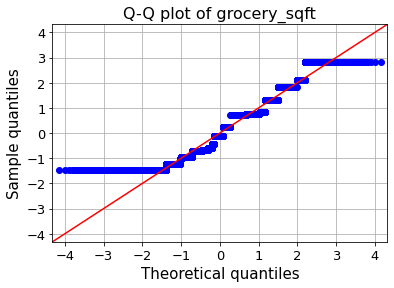

<Figure size 576x360 with 0 Axes>

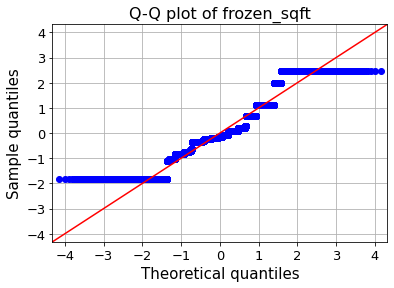

<Figure size 576x360 with 0 Axes>

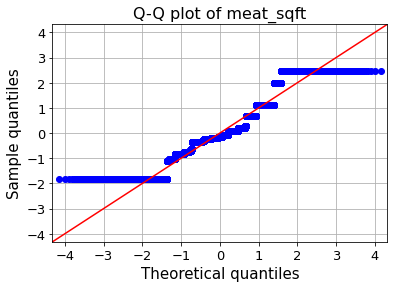

<Figure size 576x360 with 0 Axes>

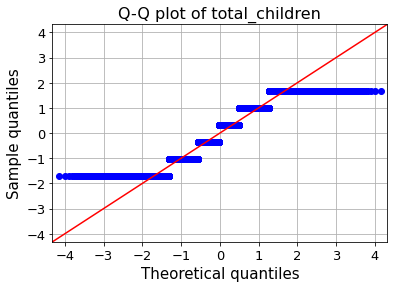

<Figure size 576x360 with 0 Axes>

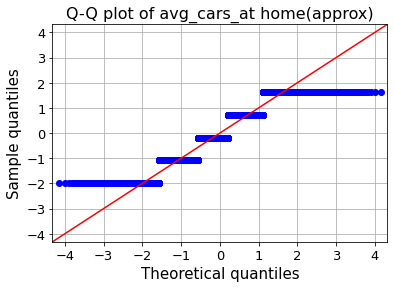

<Figure size 576x360 with 0 Axes>

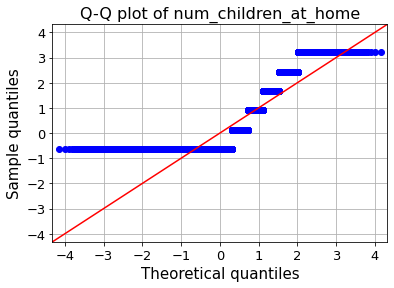

<Figure size 576x360 with 0 Axes>

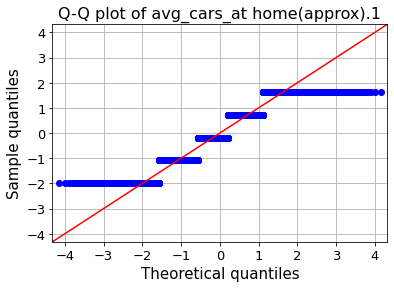

<Figure size 576x360 with 0 Axes>

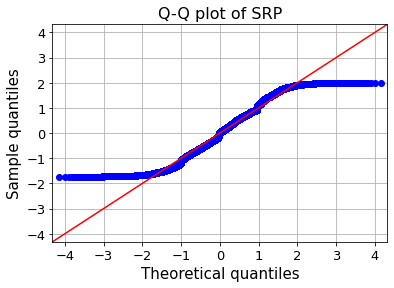

<Figure size 576x360 with 0 Axes>

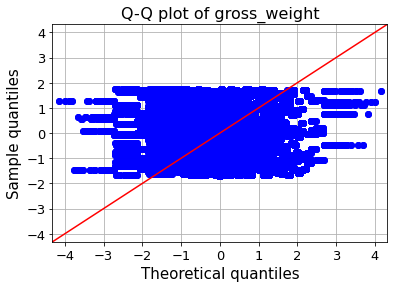

<Figure size 576x360 with 0 Axes>

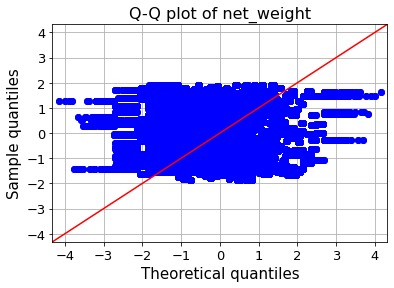

<Figure size 576x360 with 0 Axes>

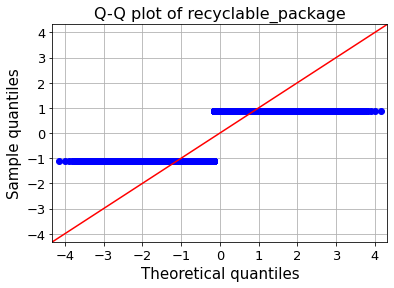

<Figure size 576x360 with 0 Axes>

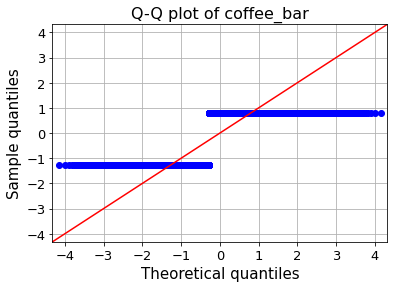

In [12]:
df2 = df1[['store_sales(in millions)','store_cost(in millions)','unit_sales(in millions)','cost','gross_weight','net_weight','units_per_case','store_sqft','grocery_sqft','frozen_sqft','meat_sqft','total_children','avg_cars_at home(approx)','num_children_at_home','avg_cars_at home(approx).1','SRP','gross_weight','net_weight','recyclable_package','coffee_bar']]

for c in df2.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(df2[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

1. Normal Distribution is observed in the graphs, where all independent variables are being plotted.
2. There are a few outliers in parameters like plot_of_unit_sales, plot_of_total_children, plot of avg_car_at home

The Bell curve in the figures describe a bell curve

#Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

Method 1: Developing Co-relation between independent variables and dependent variables



In [11]:
corr_data = df.corr()
corr_y = corr_data["cost"]
corr_y.sort_values(ascending = False)

cost                          1.000000
avg_cars_at home(approx)      0.011658
avg_cars_at home(approx).1    0.011658
low_fat                       0.004207
SRP                           0.002082
net_weight                    0.001343
gross_weight                  0.001281
recyclable_package           -0.001720
num_children_at_home         -0.002549
units_per_case               -0.002776
total_children               -0.003900
store_cost(in millions)      -0.004162
store_sales(in millions)     -0.004621
unit_sales(in millions)      -0.015015
grocery_sqft                 -0.025108
store_sqft                   -0.039656
meat_sqft                    -0.047962
frozen_sqft                  -0.047971
coffee_bar                   -0.060859
florist                      -0.087340
salad_bar                    -0.095596
prepared_food                -0.095596
video_store                  -0.111214
Name: cost, dtype: float64

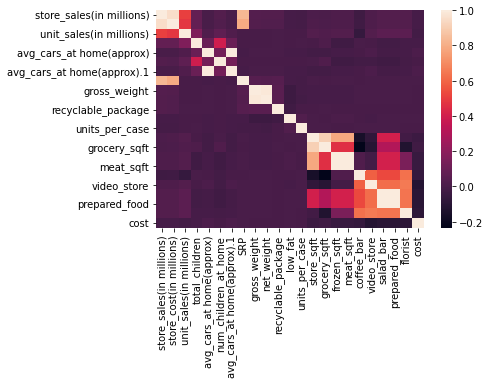

In [12]:
import seaborn as sns
sns.heatmap(df.corr())

Method 2 : Apply Linearity

In [40]:
X = df_drop.iloc[:,2:-1]

y = df_drop.iloc[:,-1]

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_sc = sc.transform(X)
X_sc =pd.DataFrame(X_sc,index= X.index, columns= X.columns)
X_s = X_sc # backup used later
X_sc.head()

,unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,1.095643,-1.029341,-1.081682,0.130925,-1.081682,-0.295082,1.274931,1.260683,0.888809,-0.734499,-0.181381,-0.051654,-0.116317,0.064819,0.06488,0.79515,1.35041,0.837143,0.837143,0.881732
1,-0.112567,-1.700413,1.621911,-0.636291,1.621911,-0.295082,1.274931,1.260683,0.888809,-0.734499,-0.181381,-0.051654,-0.116317,0.064819,0.06488,0.79515,1.35041,0.837143,0.837143,0.881732
2,-1.320778,0.983876,-1.081682,-0.636291,-1.081682,-0.295082,1.274931,1.260683,0.888809,-0.734499,-0.181381,-0.051654,-0.116317,0.064819,0.06488,0.79515,1.35041,0.837143,0.837143,0.881732
3,-1.320778,-0.358269,-0.180484,0.898141,-0.180484,-0.295082,1.274931,1.260683,0.888809,-0.734499,-0.181381,-0.051654,-0.116317,0.064819,0.06488,0.79515,1.35041,0.837143,0.837143,0.881732
4,-0.112567,-1.700413,-0.180484,-0.636291,-0.180484,-0.809650,-1.446449,-1.427795,-1.125101,1.361473,0.988384,-0.051654,-0.116317,0.064819,0.06488,0.79515,1.35041,0.837143,0.837143,0.881732


Method 3: Apply VIF

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_sc.columns
    vif["VIF"] = [variance_inflation_factor(X_sc.values, i) for i in range(X_sc.shape[1])]
    vif = vif.sort_values(by = 'VIF', ascending=False)
    return(vif)
calc_vif(X_sc)

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
2,avg_cars_at home(approx),inf
4,avg_cars_at home(approx).1,inf
18,prepared_food,inf
17,salad_bar,inf
11,store_sqft,1.766126e+08
12,grocery_sqft,8.639697e+07
13,frozen_sqft,2.350405e+07
14,meat_sqft,1.495026e+07
7,net_weight,4.540140e+01
6,gross_weight,4.539807e+01


In [45]:
def drop_large_vif(a):
    calc_vif(a)
    for i in range(len(a.columns)-1):
        col = calc_vif(a).iloc[0,0]
        val = calc_vif(a).iloc[0,1]
        if val > 10:
            a.drop(col,axis=1,inplace=True)
    return calc_vif(a)
    
drop_large_vif(X_sc)

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
13,salad_bar,3.390310
14,florist,2.505522
12,video_store,2.356106
11,coffee_bar,2.117365
9,grocery_sqft,1.794131
10,frozen_sqft,1.535205
1,total_children,1.217848
2,num_children_at_home,1.199217
0,unit_sales(in millions),1.051812
3,avg_cars_at home(approx).1,1.021654


In [47]:
X

,unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,4.0,1.0,1.0,1.0,1.0,1.84,19.70,17.70,1.0,0.0,17.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0
1,3.0,0.0,4.0,0.0,4.0,1.84,19.70,17.70,1.0,0.0,17.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0
2,2.0,4.0,1.0,0.0,1.0,1.84,19.70,17.70,1.0,0.0,17.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0
3,2.0,2.0,2.0,2.0,2.0,1.84,19.70,17.70,1.0,0.0,17.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0
4,3.0,0.0,2.0,0.0,2.0,1.36,7.12,5.11,0.0,1.0,29.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,1.0,1.0,1.0,1.0,1.0,2.76,19.60,18.60,1.0,0.0,26.0,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0
60424,1.0,2.0,2.0,0.0,2.0,1.60,17.40,15.30,1.0,0.0,36.0,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0
60425,2.0,1.0,3.0,0.0,3.0,2.76,19.60,18.60,1.0,0.0,26.0,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0
60426,3.0,2.0,4.0,0.0,4.0,2.76,19.60,18.60,1.0,0.0,26.0,34452.0,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0


In [48]:
y

0        126.62
1         59.86
2         84.16
3         95.78
4         50.79
          ...  
60423     95.25
60424     69.42
60425     67.51
60426    132.88
60427     87.76
Name: cost, Length: 60428, dtype: float64

In [49]:
y = y.astype(int)

In [50]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X, y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

meat_sqft                     1.697367
store_sqft                    1.696024
grocery_sqft                  1.695349
frozen_sqft                   1.694288
florist                       0.216300
prepared_food                 0.209381
salad_bar                     0.204807
video_store                   0.203739
coffee_bar                    0.196783
num_children_at_home          0.026583
avg_cars_at home(approx).1    0.024270
unit_sales(in millions)       0.022734
total_children                0.016796
avg_cars_at home(approx)      0.015003
low_fat                       0.000951
units_per_case                0.000369
recyclable_package            0.000000
net_weight                    0.000000
gross_weight                  0.000000
SRP                           0.000000
dtype: float64

#Which independent variables are useful to predict a target(dependent variable)?

1. We will check the correlation between predictor and target variable along its p value.

In [13]:
X = df[['store_sales(in millions)','store_cost(in millions)','unit_sales(in millions)','cost','gross_weight','net_weight','units_per_case','store_sqft','grocery_sqft','frozen_sqft','meat_sqft','total_children','avg_cars_at home(approx)','num_children_at_home','avg_cars_at home(approx).1','SRP','gross_weight','net_weight','recyclable_package','coffee_bar']]

y = df[['cost']]

In [53]:
corr_data = df.corr()
corr_y = corr_data["cost"]
corr_y.sort_values(ascending = False)

cost                          1.000000
avg_cars_at home(approx)      0.011658
avg_cars_at home(approx).1    0.011658
low_fat                       0.004207
SRP                           0.002082
net_weight                    0.001343
gross_weight                  0.001281
recyclable_package           -0.001720
num_children_at_home         -0.002549
units_per_case               -0.002776
total_children               -0.003900
store_cost(in millions)      -0.004162
store_sales(in millions)     -0.004621
unit_sales(in millions)      -0.015015
grocery_sqft                 -0.025108
store_sqft                   -0.039656
meat_sqft                    -0.047962
frozen_sqft                  -0.047971
coffee_bar                   -0.060859
florist                      -0.087340
salad_bar                    -0.095596
prepared_food                -0.095596
video_store                  -0.111214
Name: cost, dtype: float64

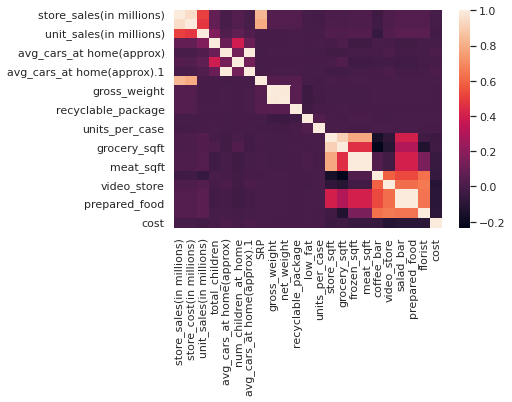

In [54]:
sns.heatmap(df.corr())

Method 2 Using Linearity 

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_sc = sc.transform(X)
X_sc =pd.DataFrame(X_sc,index= X.index, columns= X.columns)
X_s = X_sc # backup used later
X_sc.head()

,unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,1.095643,-1.029341,-1.081682,0.130925,-1.081682,-0.295082,1.274931,1.260683,0.888809,-0.734499,-0.181381,-0.051654,-0.116317,0.064819,0.06488,0.79515,1.35041,0.837143,0.837143,0.881732
1,-0.112567,-1.700413,1.621911,-0.636291,1.621911,-0.295082,1.274931,1.260683,0.888809,-0.734499,-0.181381,-0.051654,-0.116317,0.064819,0.06488,0.79515,1.35041,0.837143,0.837143,0.881732
2,-1.320778,0.983876,-1.081682,-0.636291,-1.081682,-0.295082,1.274931,1.260683,0.888809,-0.734499,-0.181381,-0.051654,-0.116317,0.064819,0.06488,0.79515,1.35041,0.837143,0.837143,0.881732
3,-1.320778,-0.358269,-0.180484,0.898141,-0.180484,-0.295082,1.274931,1.260683,0.888809,-0.734499,-0.181381,-0.051654,-0.116317,0.064819,0.06488,0.79515,1.35041,0.837143,0.837143,0.881732
4,-0.112567,-1.700413,-0.180484,-0.636291,-0.180484,-0.809650,-1.446449,-1.427795,-1.125101,1.361473,0.988384,-0.051654,-0.116317,0.064819,0.06488,0.79515,1.35041,0.837143,0.837143,0.881732


Apply VIF

In [16]:
from sklearn.feature_selection import mutual_info_classif

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_sc.columns
    vif["VIF"] = [variance_inflation_factor(X_sc.values, i) for i in range(X_sc.shape[1])]
    vif = vif.sort_values(by = 'VIF', ascending=False)
    return(vif)
calc_vif(X_sc)

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
2,avg_cars_at home(approx),inf
4,avg_cars_at home(approx).1,inf
18,prepared_food,inf
17,salad_bar,inf
11,store_sqft,1.766126e+08
12,grocery_sqft,8.639697e+07
13,frozen_sqft,2.350405e+07
14,meat_sqft,1.495026e+07
7,net_weight,4.540140e+01
6,gross_weight,4.539807e+01


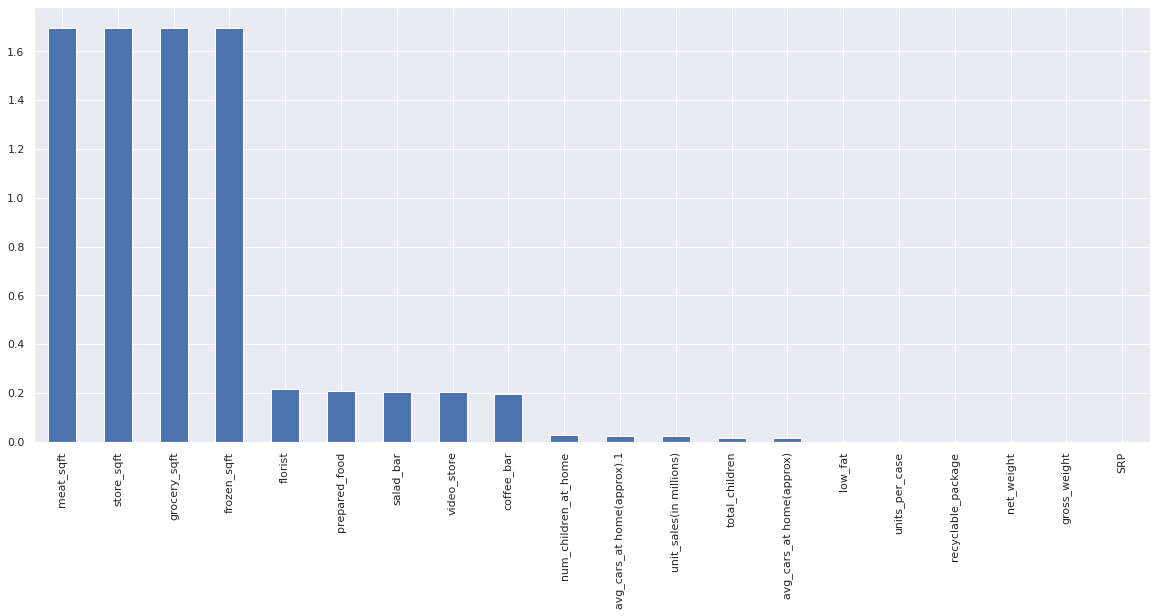

In [59]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99 )

#Do the training and test sets have the same data?

> No. They are from the same distribution but not equal to each other.

#Are the predictor variables independent of all the other predictor variables?



> To find this, we need to find if there is any correlation between the features. 

> Let us plot a correlation heatmap to test this.



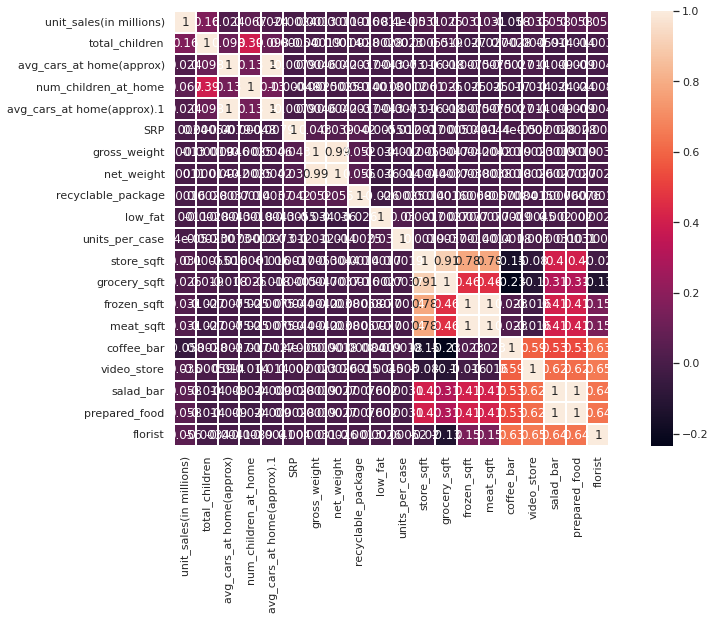

In [61]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(X.corr(), linewidths=1, annot = True, square =True , )



> The above figure shows that there is multicollinearity present. Thus some predictor variables are dependent on others.

We can learn more about multicollinearity from [here](https://towardsdatascience.com/how-to-identify-the-right-independent-variables-for-machine-learning-supervised-algorithms-439986562d32)



# Which predictor variables are the most important?**



> For this question, we will use the **SelectKBest** package to find the top 4 important features.

> It uses mutual information (MI) that we have already calculated above to select the K best features.



In [62]:
from sklearn.feature_selection import SelectKBest

sel_four_cols = SelectKBest(mutual_info_classif, k=4)
sel_four_cols.fit(X, y)
X.columns[sel_four_cols.get_support()]

Index(['store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft'], dtype='object')

#Do the ranges of the predictor variables make sense?

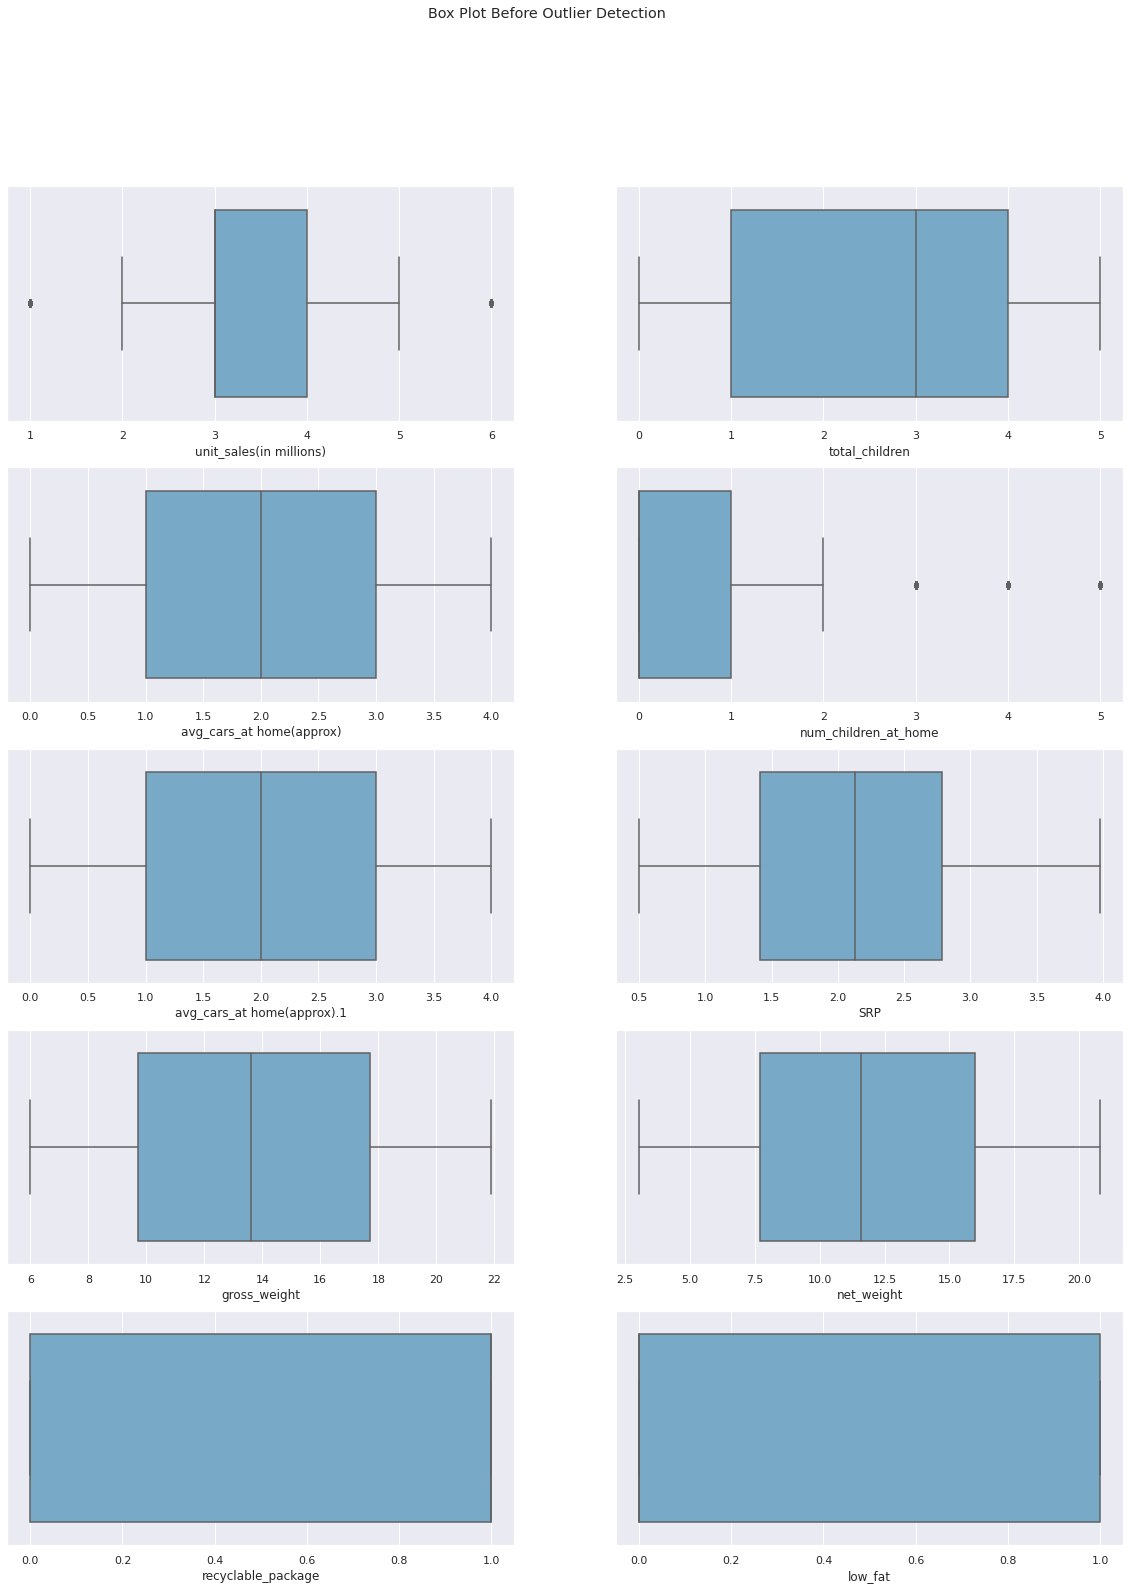

In [63]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(5,2, figsize=(20,25))
fig.suptitle('Box Plot Before Outlier Detection')
k = 0
for i in range(0,5):
    for j in range(0,2):
        sns.boxplot(ax=axes[i,j], data=df, x=X.columns[k], palette="Blues")
        k=k+1

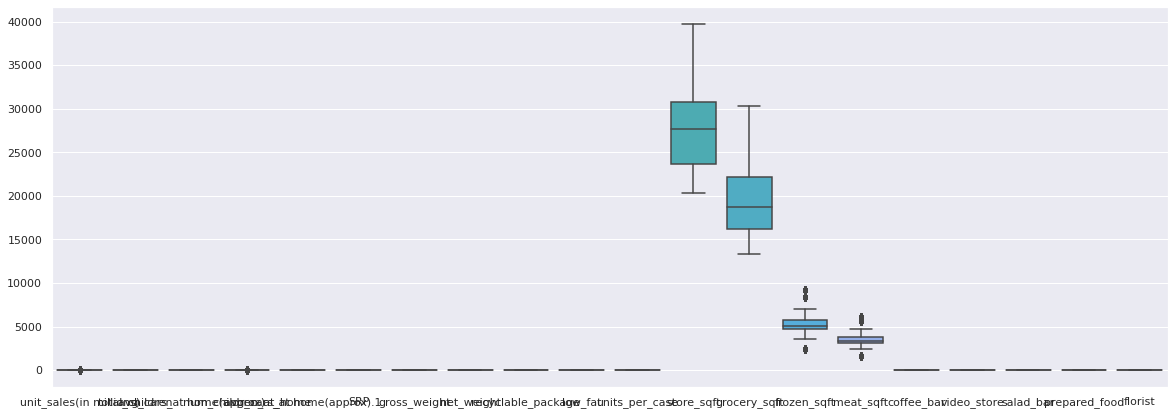

In [64]:
plt.figure(figsize=(20,7))
sns.boxplot(data=X)

#Q. What are the distributions of the predictor variables?**

<Figure size 576x360 with 0 Axes>

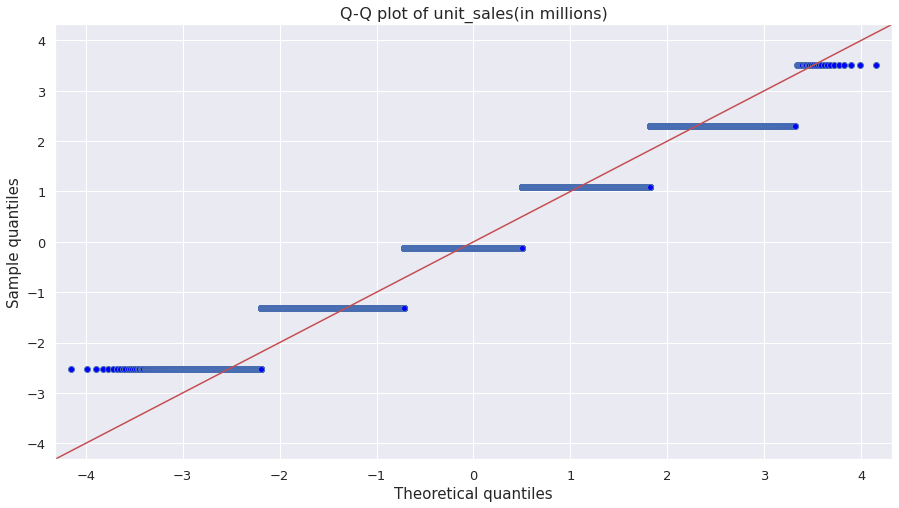

<Figure size 576x360 with 0 Axes>

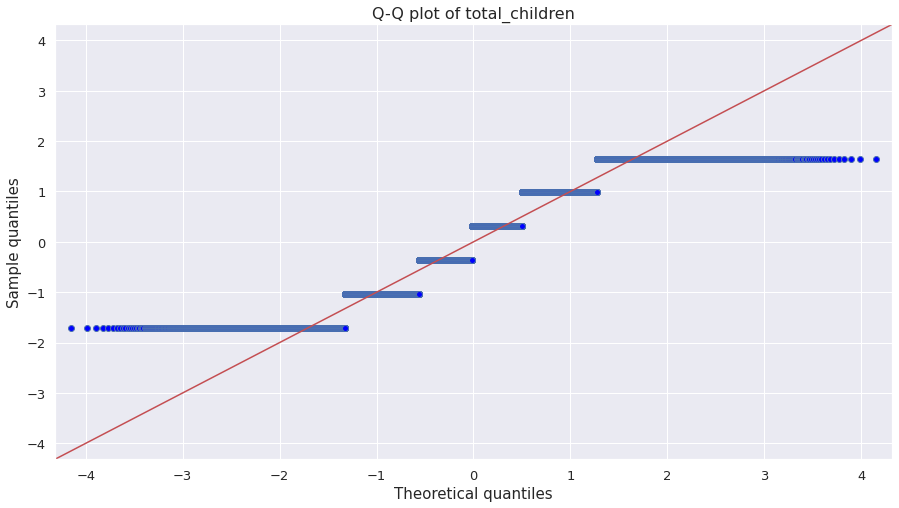

<Figure size 576x360 with 0 Axes>

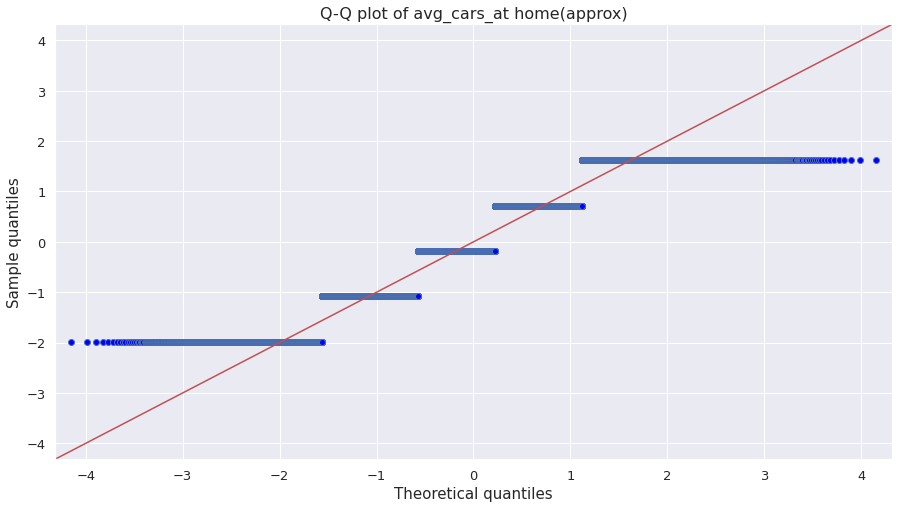

<Figure size 576x360 with 0 Axes>

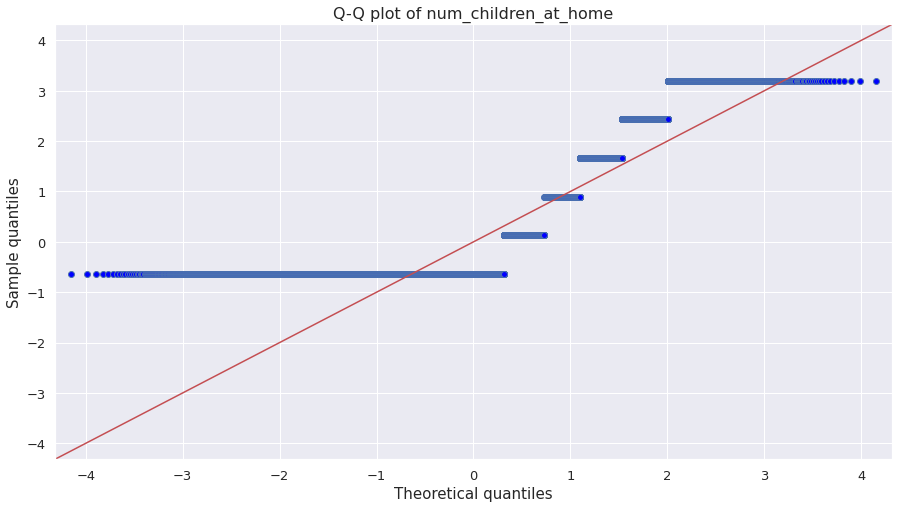

<Figure size 576x360 with 0 Axes>

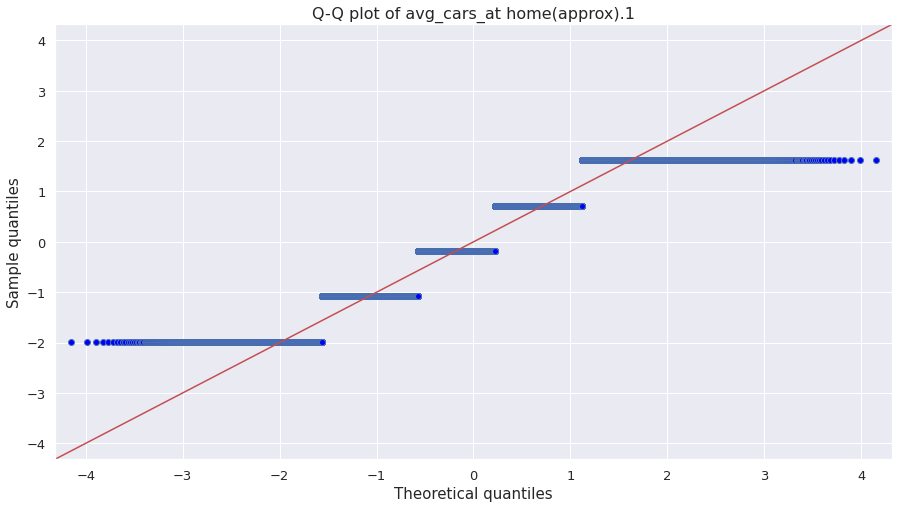

<Figure size 576x360 with 0 Axes>

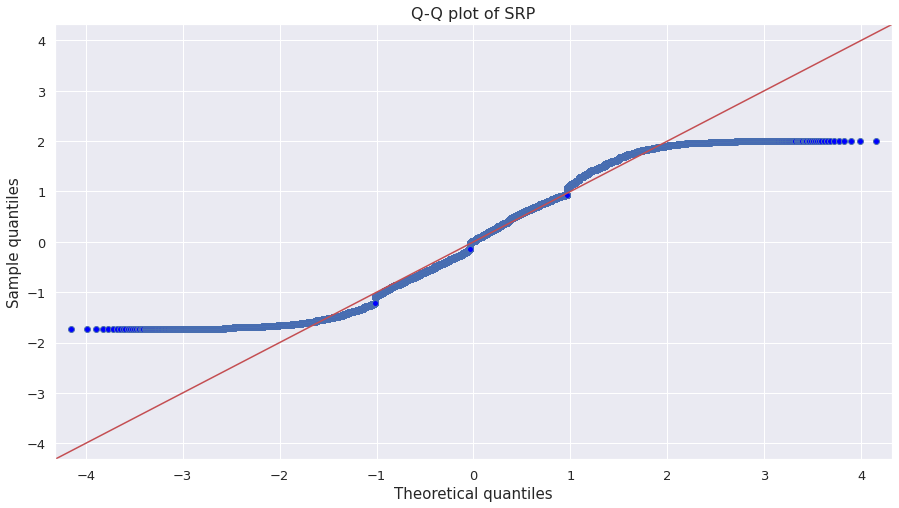

<Figure size 576x360 with 0 Axes>

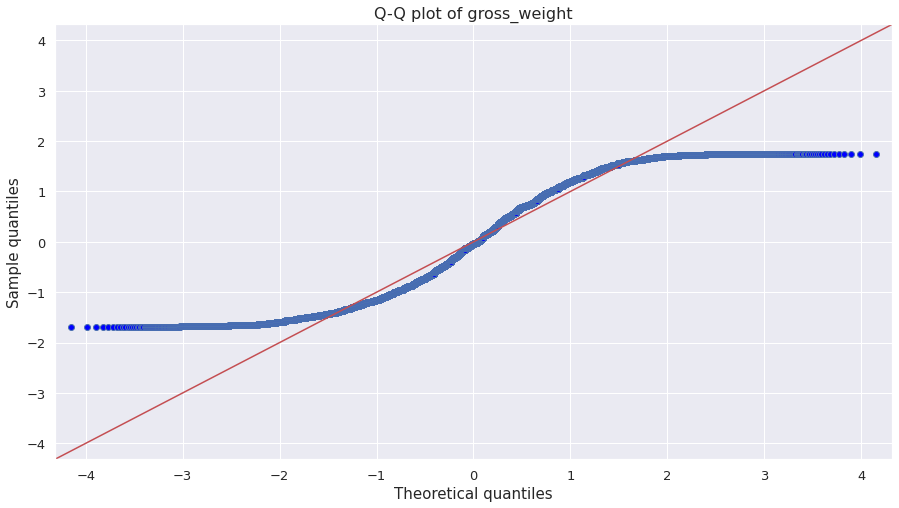

<Figure size 576x360 with 0 Axes>

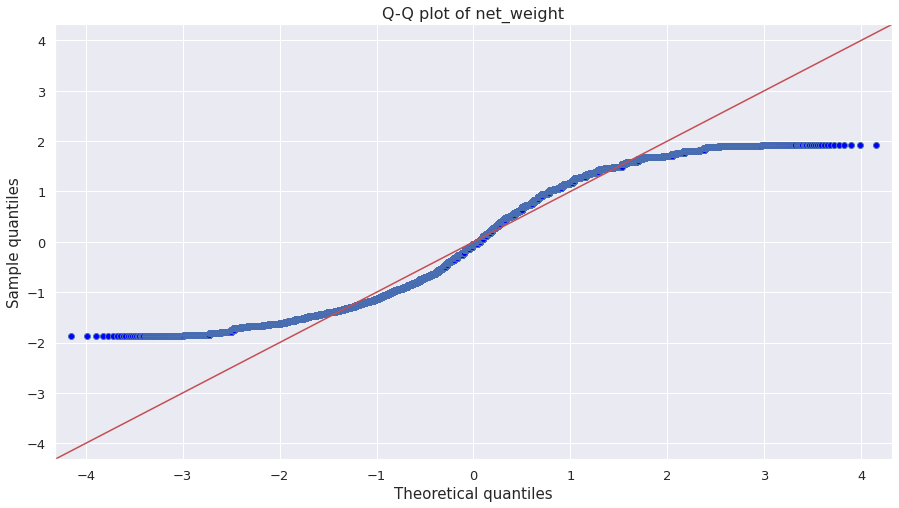

<Figure size 576x360 with 0 Axes>

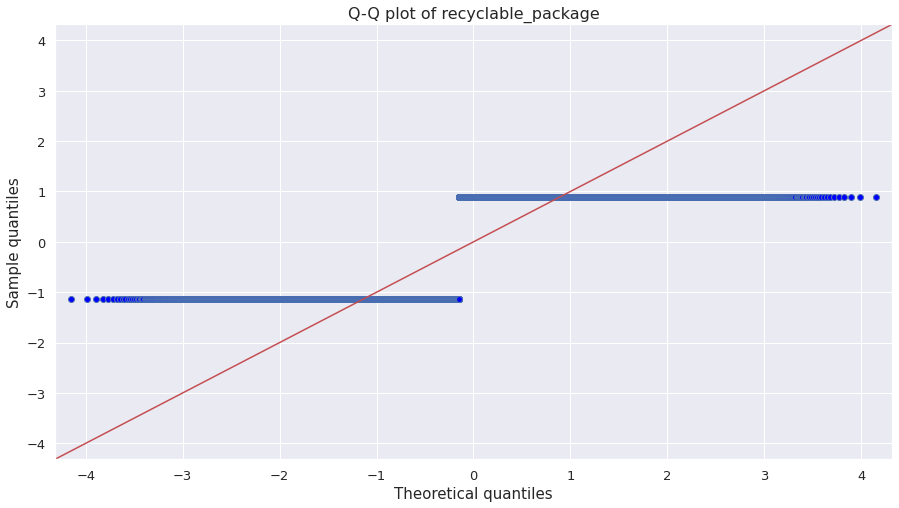

<Figure size 576x360 with 0 Axes>

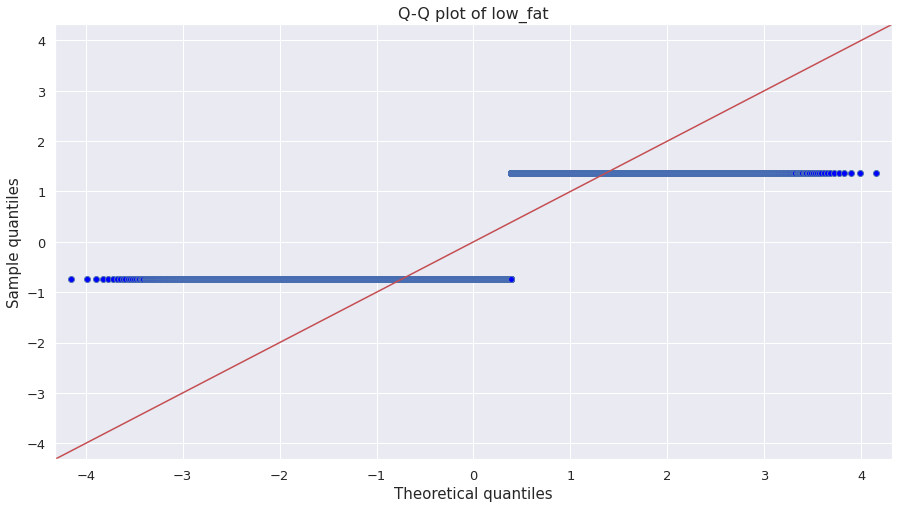

<Figure size 576x360 with 0 Axes>

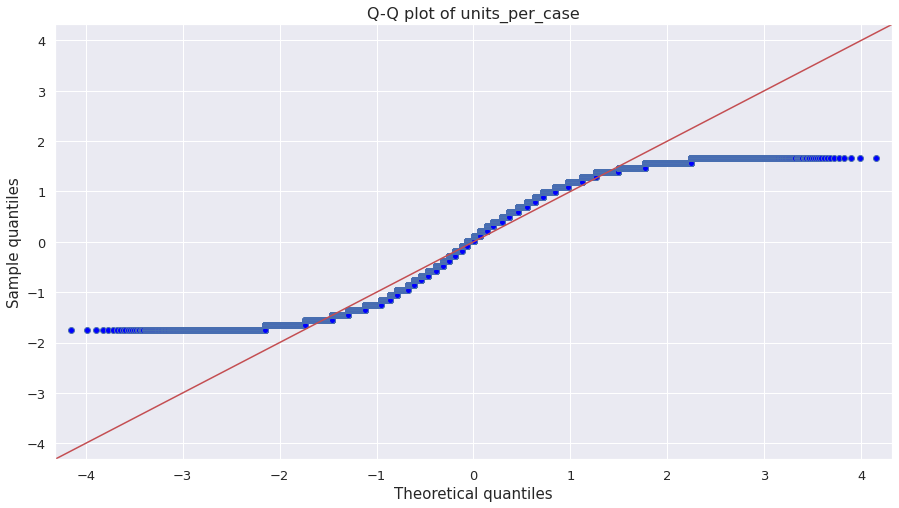

<Figure size 576x360 with 0 Axes>

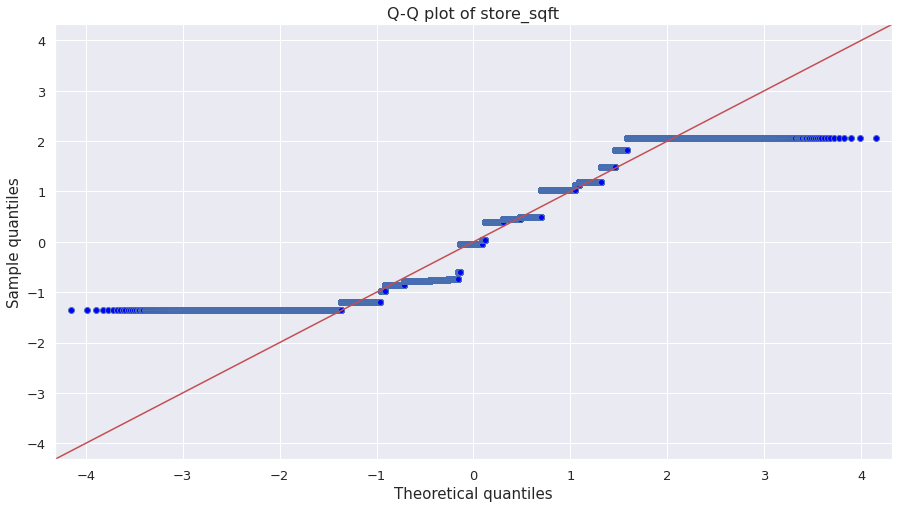

<Figure size 576x360 with 0 Axes>

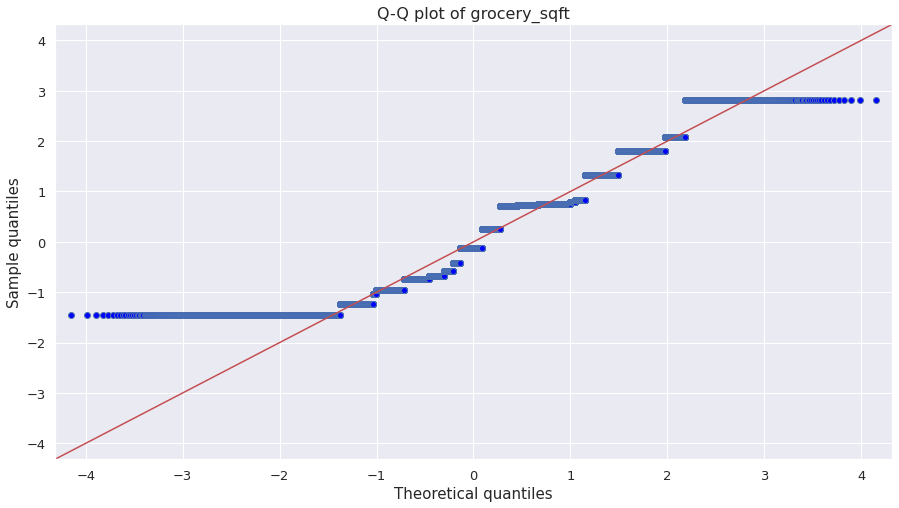

<Figure size 576x360 with 0 Axes>

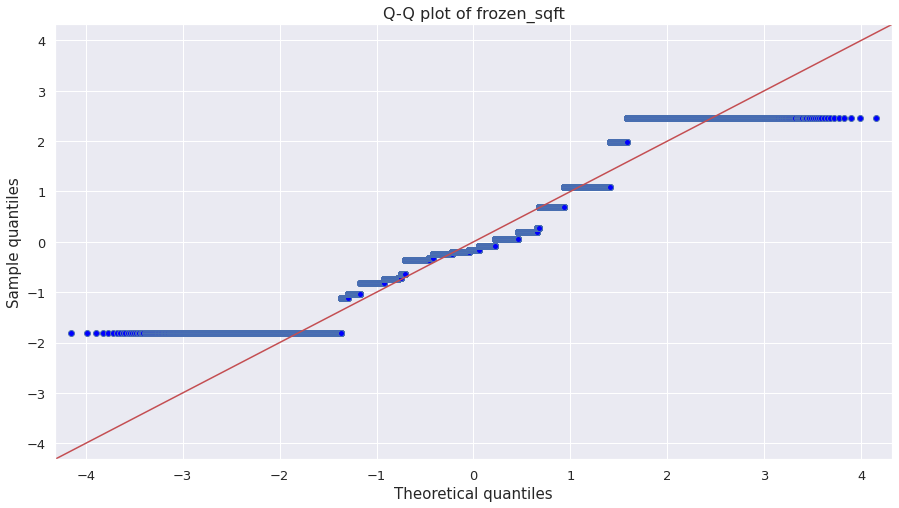

<Figure size 576x360 with 0 Axes>

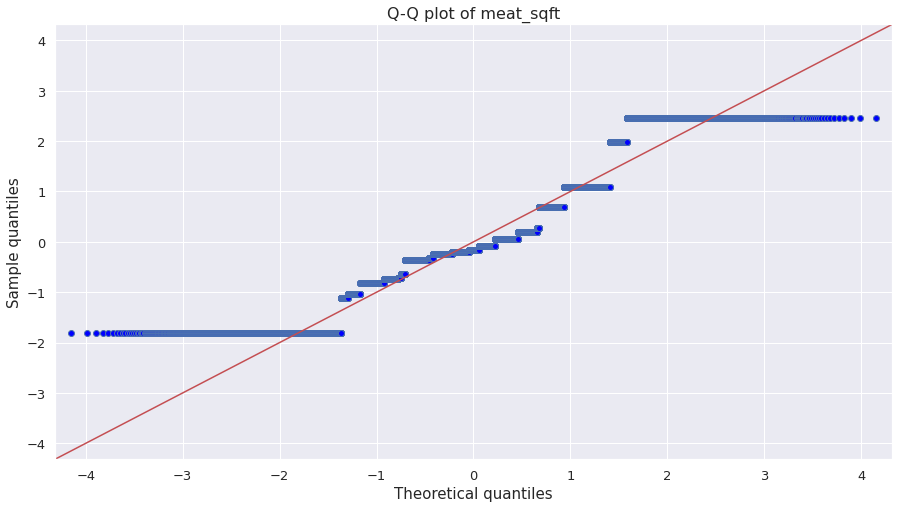

<Figure size 576x360 with 0 Axes>

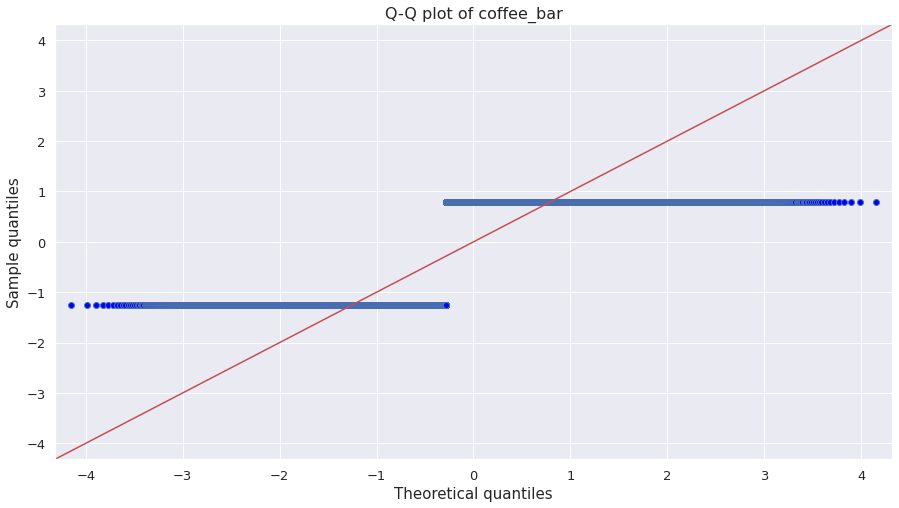

<Figure size 576x360 with 0 Axes>

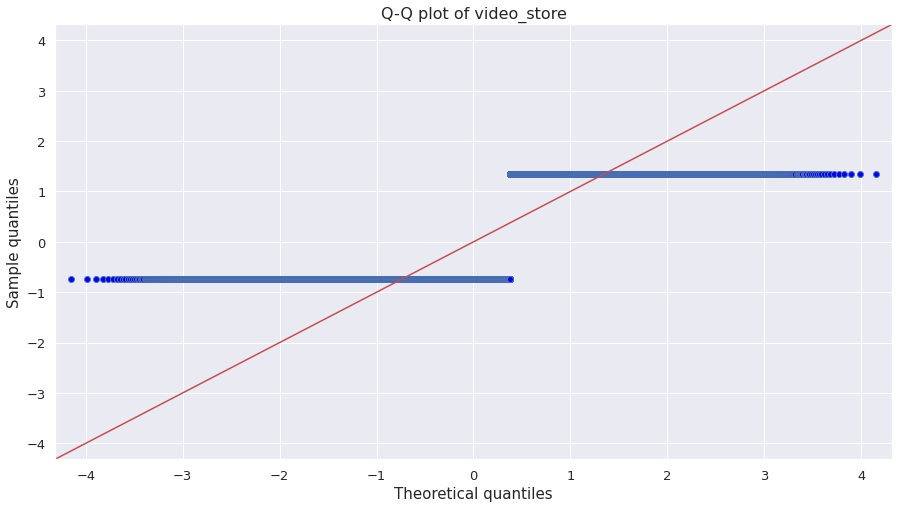

<Figure size 576x360 with 0 Axes>

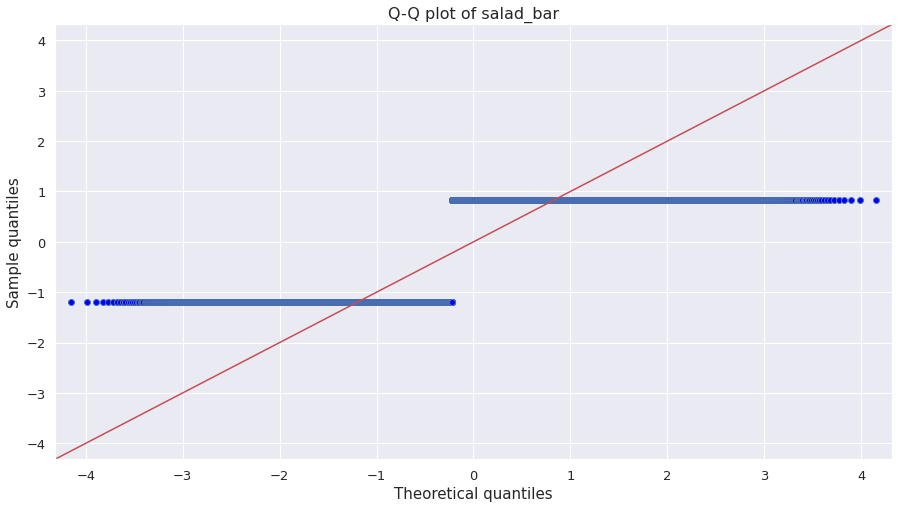

<Figure size 576x360 with 0 Axes>

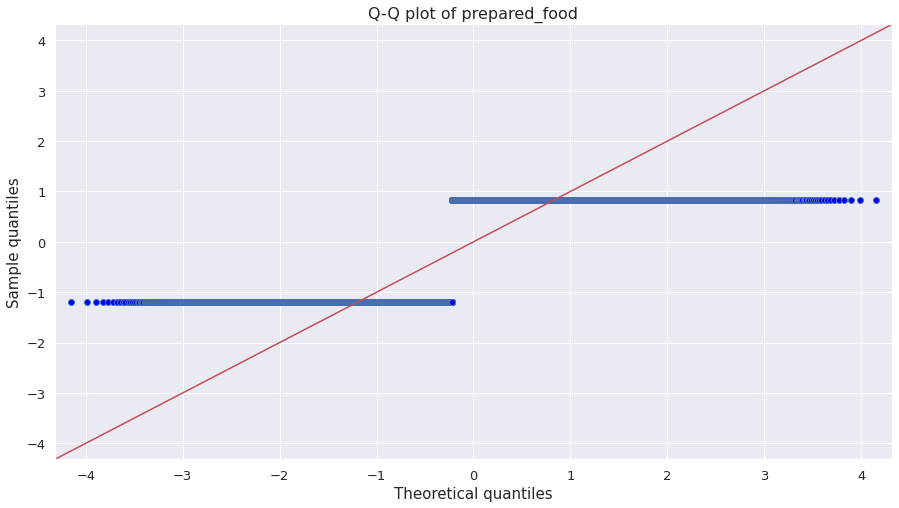

<Figure size 576x360 with 0 Axes>

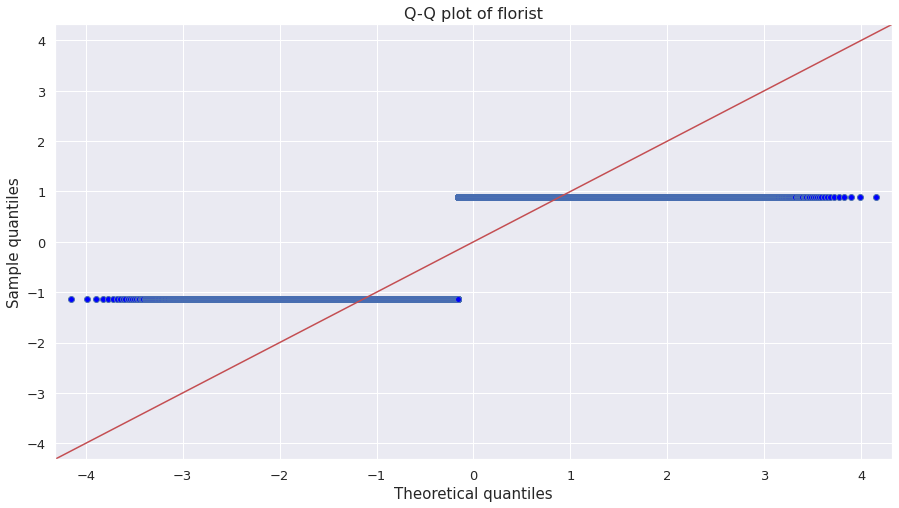

In [65]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm= X
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

#Identifying the independent and dependent variables in the dataset?


In this dataset, from observing the data, it is clear the the variables such as **store_sqft, grocery_sqft, frozen_sqft, meat_sqft**, whose values do not change and they stay fixed.

Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)



In [ ]:
from sklearn.feature_selection import SelectKBest

sel_four_cols = SelectKBest(mutual_info_classif, k=4)
sel_four_cols.fit(X, y)
X.columns[sel_four_cols.get_support()]

#Which independent variables have missing data? How much? 

In [134]:
df2 = df[['store_sales(in millions)','store_cost(in millions)','unit_sales(in millions)','cost','gross_weight','net_weight','units_per_case','store_sqft','grocery_sqft','frozen_sqft','meat_sqft','total_children','avg_cars_at home(approx)','num_children_at_home','avg_cars_at home(approx).1','SRP','gross_weight','net_weight','recyclable_package','coffee_bar']]

In [135]:
df2.isnull().sum()

store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
cost                          0
gross_weight                  0
net_weight                    0
units_per_case                0
store_sqft                    0
grocery_sqft                  0
frozen_sqft                   0
meat_sqft                     0
total_children                0
avg_cars_at home(approx)      0
num_children_at_home          0
avg_cars_at home(approx).1    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
coffee_bar                    0
dtype: int64

From the above operation we can observe that the independent variable have no missing data.

From this dataframe, we can infer that, it is smooth for operations and calculations.

# Identifying the testing and training datasets

In [23]:
from sklearn.model_selection import train_test_split

In [24]:

X = df[['store_sales(in millions)','store_cost(in millions)','unit_sales(in millions)','cost','gross_weight','net_weight','units_per_case','store_sqft','grocery_sqft','frozen_sqft','meat_sqft','total_children','avg_cars_at home(approx)','num_children_at_home','avg_cars_at home(approx).1','SRP','gross_weight','net_weight','recyclable_package','coffee_bar']]
y = df[['cost']]

In [25]:
#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

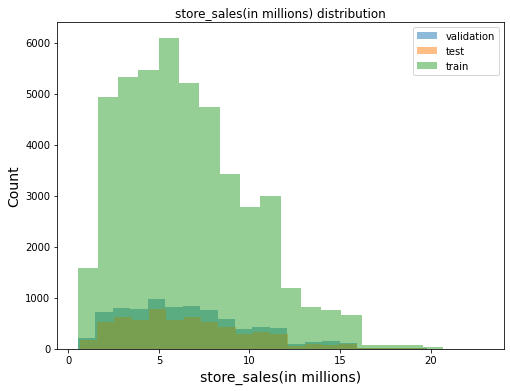

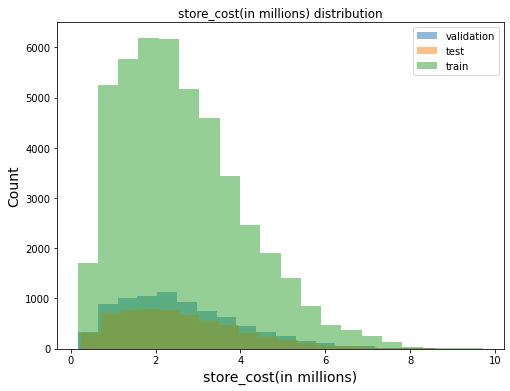

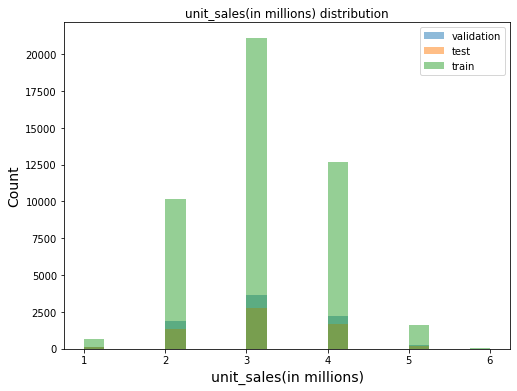

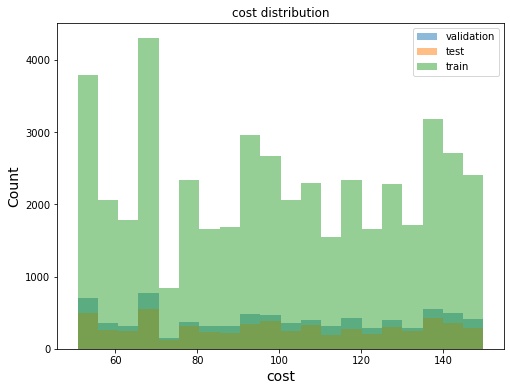

In [ ]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['store_sales(in millions)','store_cost(in millions)','unit_sales(in millions)','cost','gross_weight','net_weight','units_per_case','store_sqft','grocery_sqft','frozen_sqft','meat_sqft','total_children','avg_cars_at home(approx)','num_children_at_home','avg_cars_at home(approx).1','SRP','gross_weight','net_weight','recyclable_package','coffee_bar']]

X_val_plot = X_val[['store_sales(in millions)','store_cost(in millions)','unit_sales(in millions)','cost','gross_weight','net_weight','units_per_case','store_sqft','grocery_sqft','frozen_sqft','meat_sqft','total_children','avg_cars_at home(approx)','num_children_at_home','avg_cars_at home(approx).1','SRP','gross_weight','net_weight','recyclable_package','coffee_bar']]

X_train_plot = X_train[['store_sales(in millions)','store_cost(in millions)','unit_sales(in millions)','cost','gross_weight','net_weight','units_per_case','store_sqft','grocery_sqft','frozen_sqft','meat_sqft','total_children','avg_cars_at home(approx)','num_children_at_home','avg_cars_at home(approx).1','SRP','gross_weight','net_weight','recyclable_package','coffee_bar']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

#Splitting both the training and testing datasets?

Lets divide the entire dataset, where 80% of the dataset is the training dataset and 20% is the testing dataset.

So lets divide the dataset, where we figure out the shape and select 80% of the rows in the training dataset.

80% of 60428 = 0.80*60428 = 48342 rows will be the training

In [ ]:
df.shape

In [ ]:
train_df = df.iloc[:48342,:]
test_df = df.iloc[48343:,:]

In [ ]:
train_df.describe()

#In the predictor variables independent of all the other predictor variables?

To find this, we need to figure out if there is any correlation between features

In [ ]:
def calc_vif(x):

  #Calculating the Variance Inflation Factor
  vif = pd.DataFrame()
  vif["variables"] = X_sc.columns

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

In [ ]:
#pair plot to check the colinearity
sns.pairplot(df) 

#Which predictor variables are the most important?

In [136]:
from sklearn.feature_selection import SelectKBest

sel_four_cols = SelectKBest(mutual_info_classif, k=4)
sel_four_cols.fit(X, y)
X.columns[sel_four_cols.get_support()]

Index(['store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft'], dtype='object')

#Do the ranges of the predictor variables make sense?

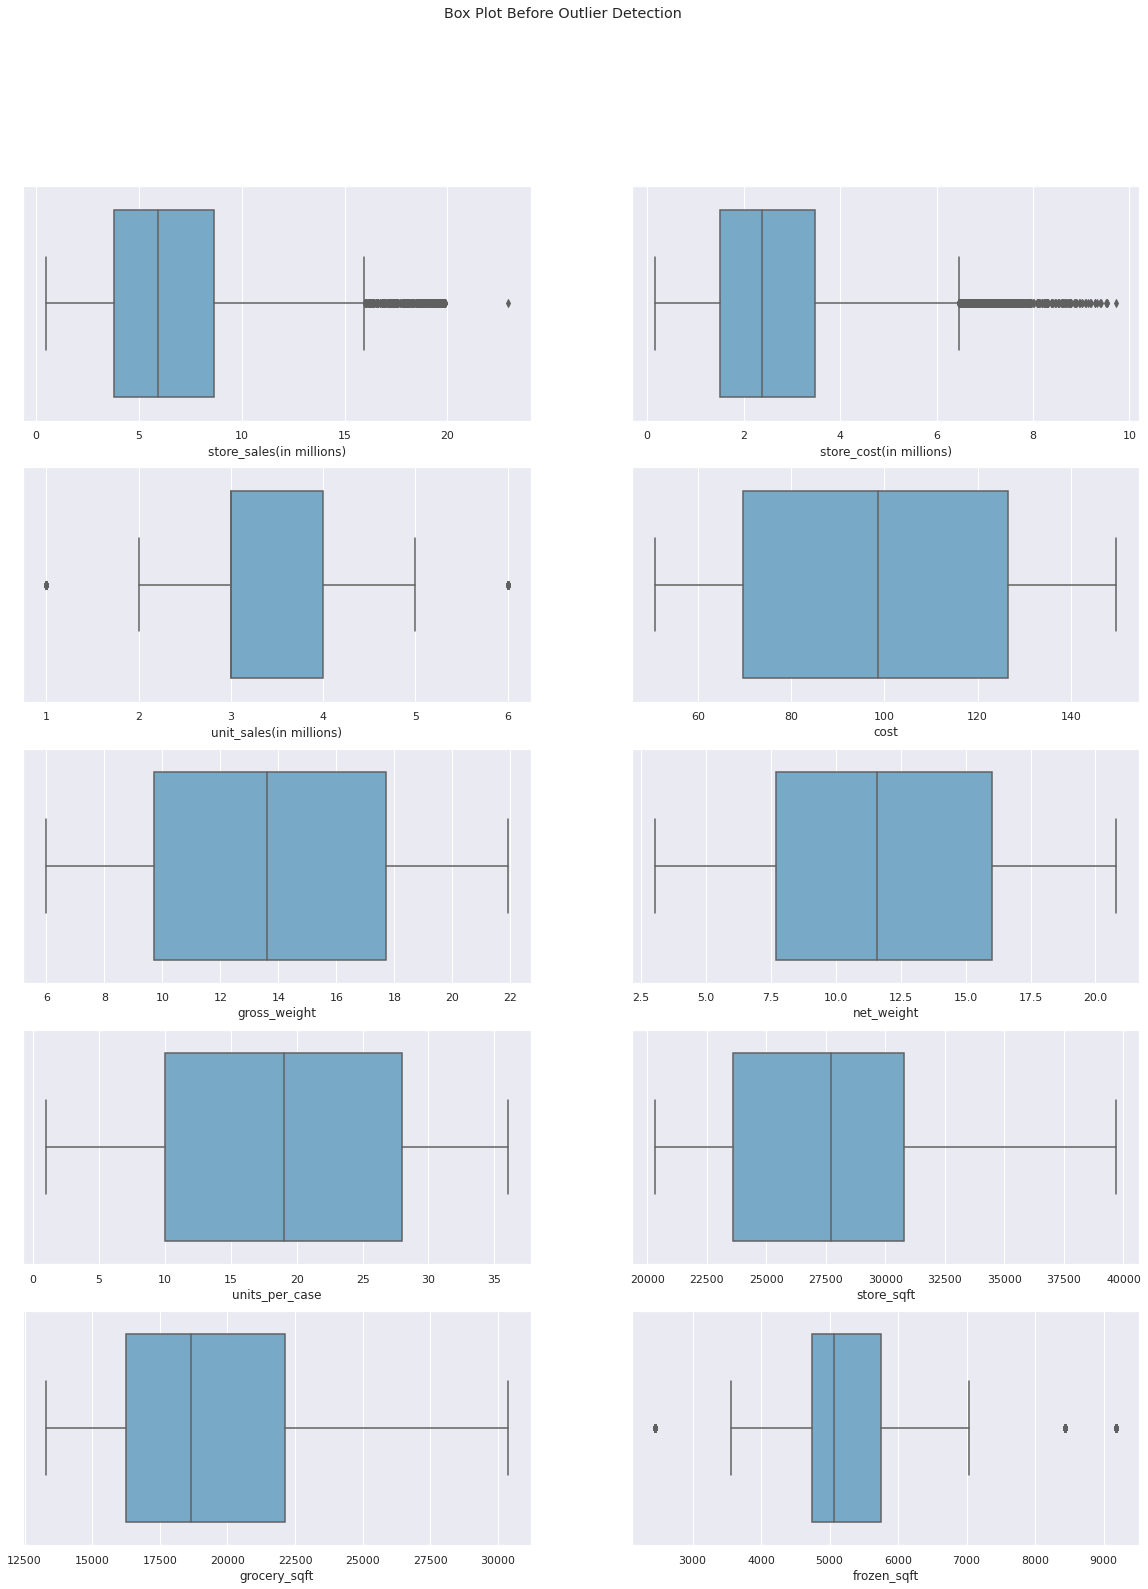

In [30]:
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
fig, axes = plt.subplots(5,2, figsize=(20,25))
fig.suptitle('Box Plot Before Outlier Detection')
k = 0
for i in range(0,5):
    for j in range(0,2):
        sns.boxplot(ax=axes[i,j], data=df, x=X.columns[k], palette="Blues")
        k=k+1

#What are the distributions of the predictor variables?  

<Figure size 576x360 with 0 Axes>

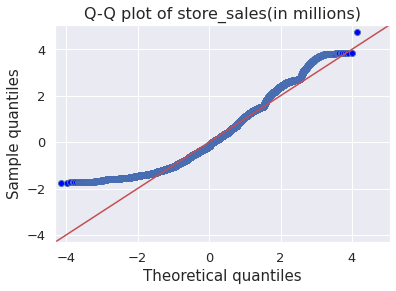

<Figure size 576x360 with 0 Axes>

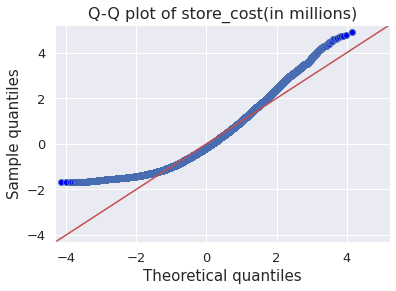

<Figure size 576x360 with 0 Axes>

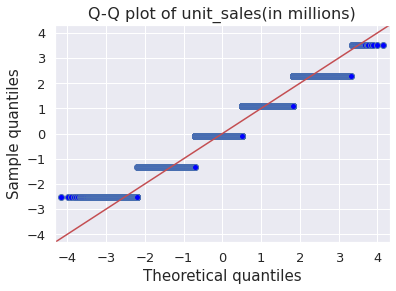

<Figure size 576x360 with 0 Axes>

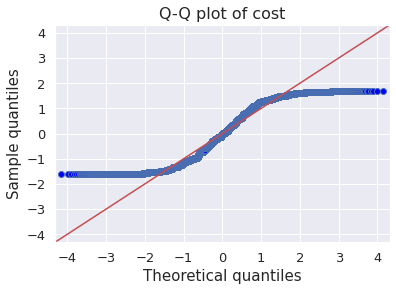

<Figure size 576x360 with 0 Axes>

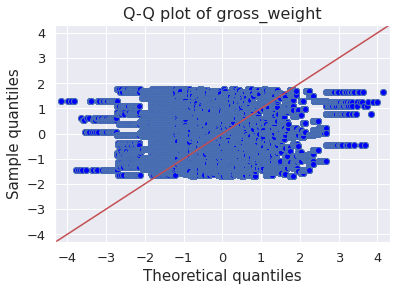

<Figure size 576x360 with 0 Axes>

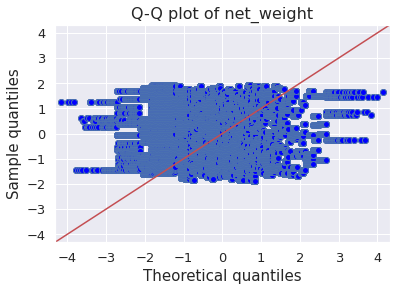

<Figure size 576x360 with 0 Axes>

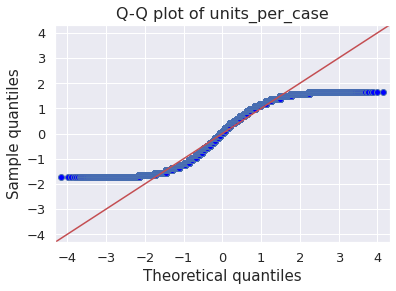

<Figure size 576x360 with 0 Axes>

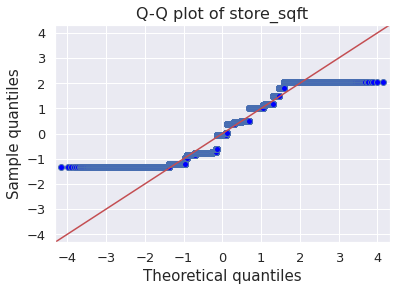

<Figure size 576x360 with 0 Axes>

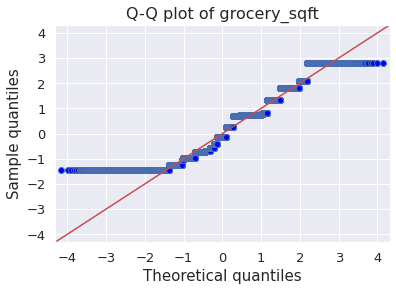

<Figure size 576x360 with 0 Axes>

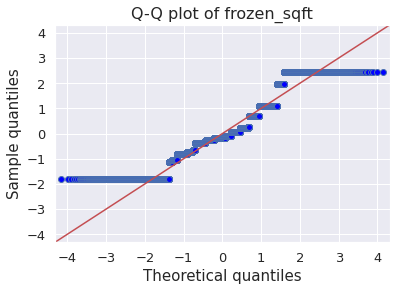

<Figure size 576x360 with 0 Axes>

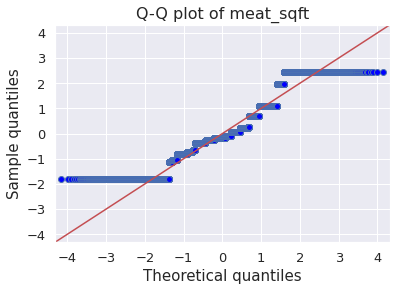

<Figure size 576x360 with 0 Axes>

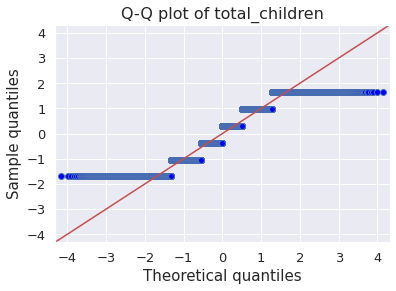

<Figure size 576x360 with 0 Axes>

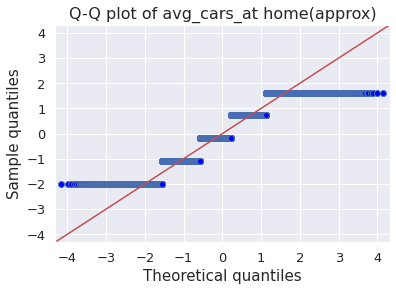

<Figure size 576x360 with 0 Axes>

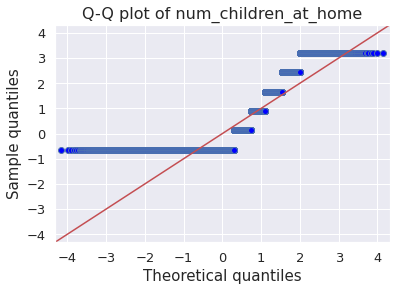

<Figure size 576x360 with 0 Axes>

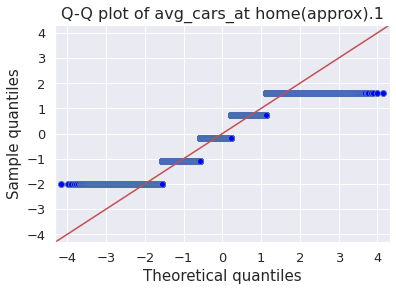

<Figure size 576x360 with 0 Axes>

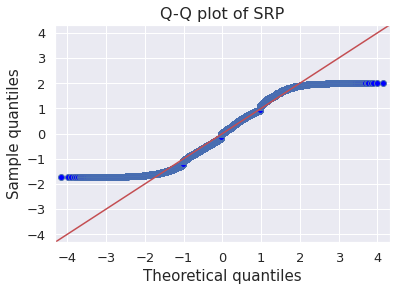

<Figure size 576x360 with 0 Axes>

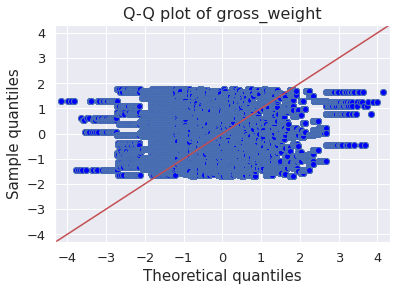

<Figure size 576x360 with 0 Axes>

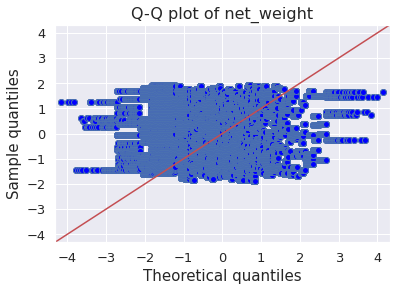

<Figure size 576x360 with 0 Axes>

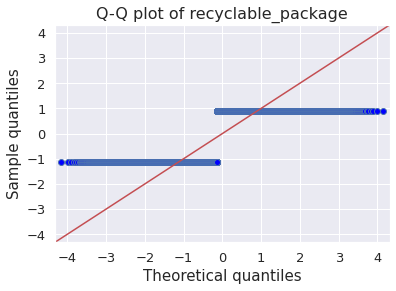

<Figure size 576x360 with 0 Axes>

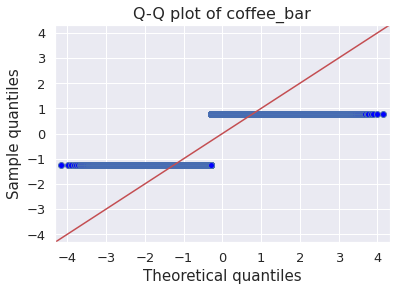

In [31]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm= X
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

#Remove outliers and keep outliers (does if have an effect of the final predictive model)?

In [22]:
missing_list = df.columns[df.isna().any()].tolist() 
missing_count = []      
for i in missing_list:
  missing_count.append(sum(pd.isnull(df[str(i)])))

d = {'Missing_Column':missing_list,'Missing_Values':missing_count}
Missing_DF = pd.DataFrame(d)
Missing_DF["%_Missing"] = (Missing_DF['Missing_Values'] / df.shape[0]) * 100
Missing_DF

,Missing_Column,Missing_Values,%_Missing


Here we use the KNN Clusturing Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)


In [ ]:
knn(X_test, y_test)

#Linear Regression

In [32]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [33]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

LinearRegression()

In [34]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error: 0.00
Coefficient of determination: 1.00
R^2 score on tarining set = 1.0


In [35]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.00
Coefficient of determination: 1.00
R^2 score on test set = 1.0


In [36]:
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

Mean squared error: 0.00
Coefficient of determination: 1.00
R^2 score on validation set = 1.0


In [38]:
pip install eli5


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 11.9 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=170ce20cef3ce5bdea3b35f0279633c62e12c7be3ef8790779e54d0d9ee9736c
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

In [40]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
2.0102 ± 0.0681,cost
0 ± 0.0000,coffee_bar
0 ± 0.0000,recyclable_package
0 ± 0.0000,store_cost(in millions)
0 ± 0.0000,unit_sales(in millions)
0 ± 0.0000,gross_weight
0 ± 0.0000,net_weight
0 ± 0.0000,units_per_case
0 ± 0.0000,store_sqft
0 ± 0.0000,grocery_sqft


In [69]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

#Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn import metrics
lr_model = lr()
lr_model.fit(X_train,y_train)
y_predicted = lr_model.predict(X_test_scaled)
print("Accuracy of Logistic Regression Model is = {0: .3f}".format(metrics.accuracy_score(y_test,y_predicted)))

Accuracy of Logistic Regression Model is =  0.029


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Remove outliers and keep outliers (does if have an effect of the final predictive model)?

In [71]:
# Calculating the IQR
def iqr_calculation(main_df,col):
    Q1 = np.percentile(col,25,interpolation = 'midpoint')
    Q3 = np.percentile(col,75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper = np.where(col>=(Q3+1.5*IQR))
    lower = np.where(col<=(Q1-1.5*IQR))
    return upper,lower



> Remove the outliers and reset the Dataframe Index



In [72]:
# Remove the outliers
def remove_outliers(main_df,upper,lower):
    main_df.drop(upper[0], inplace = True)
    main_df.drop(lower[0], inplace = True)
    print("New Shape: ", main_df.shape)
    return main_df

# Resetting the dataframe index
def reset_dataframe(main_df):
    main_df.reset_index(inplace=True)
    main_df.drop(columns=[''],inplace=True)
    return main_df

In [73]:
import pandas as pd

def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

#Q. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [74]:
df_unit_sales = df[['unit_sales(in millions)']]
df_unit_sales['sunit_sales(in millions)_copy_1_percent'] = df[['unit_sales(in millions)']]
df_unit_sales['unit_sales(in millions)_copy_5_percent'] = df[['unit_sales(in millions)']]
df_unit_sales['unit_sales(in millions)_copy_10_percent'] = df[['unit_sales(in millions)']]
df_unit_sales['Index'] = range(1, len(df_unit_sales) + 1)
df_unit_sales

<ipython-input-74-55e68d4fff7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unit_sales['sunit_sales(in millions)_copy_1_percent'] = df[['unit_sales(in millions)']]
<ipython-input-74-55e68d4fff7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unit_sales['unit_sales(in millions)_copy_5_percent'] = df[['unit_sales(in millions)']]
<ipython-input-74-55e68d4fff7e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,unit_sales(in millions),sunit_sales(in millions)_copy_1_percent,unit_sales(in millions)_copy_5_percent,unit_sales(in millions)_copy_10_percent,Index
0,4.0,4.0,4.0,4.0,1
1,3.0,3.0,3.0,3.0,2
2,2.0,2.0,2.0,2.0,3
3,2.0,2.0,2.0,2.0,4
4,3.0,3.0,3.0,3.0,5
...,...,...,...,...,...
60423,1.0,1.0,1.0,1.0,60424
60424,1.0,1.0,1.0,1.0,60425
60425,2.0,2.0,2.0,2.0,60426
60426,3.0,3.0,3.0,3.0,60427



##Below function checks the % of missing values




In [97]:
def get_percent_missing(dataframe):
    
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [98]:
print(get_percent_missing(df_unit_sales))

                                                                     column_name  \
unit_sales(in millions)                                  unit_sales(in millions)   
sunit_sales(in millions)_copy_1_percent  sunit_sales(in millions)_copy_1_percent   
unit_sales(in millions)_copy_5_percent    unit_sales(in millions)_copy_5_percent   
unit_sales(in millions)_copy_10_percent  unit_sales(in millions)_copy_10_percent   
Index                                                                      Index   
df_unit_sales_copy_1_percent                        df_unit_sales_copy_1_percent   
df_unit_sales_copy_5_percent                        df_unit_sales_copy_5_percent   
df_unit_sales_copy_10_percent                      df_unit_sales_copy_10_percent   

                                         percent_missing  
unit_sales(in millions)                              0.0  
sunit_sales(in millions)_copy_1_percent              0.0  
unit_sales(in millions)_copy_5_percent               0.0  
unit_sa

In [99]:
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [100]:
create_missing(df_unit_sales, 0.01, 'df_unit_sales_copy_1_percent')
create_missing(df_unit_sales, 0.05, 'df_unit_sales_copy_5_percent')
create_missing(df_unit_sales, 0.1, 'df_unit_sales_copy_10_percent')

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [101]:
# Store Index of NaN values in each coloumns
df_unit_sales_1_idx = list(np.where(df_unit_sales['df_unit_sales_copy_1_percent'].isna())[0])
df_unit_sales_5_idx = list(np.where(df_unit_sales['df_unit_sales_copy_5_percent'].isna())[0])
df_unit_sales_10_idx = list(np.where(df_unit_sales['df_unit_sales_copy_10_percent'].isna())[0])

In [102]:
print(f"Length of number_1_idx is {len(df_unit_sales_1_idx)} and it contains {(len(df_unit_sales_1_idx)/len(df_unit_sales['df_unit_sales_copy_1_percent']))*100} % of total data in column | Total rows: {len(df_unit_sales['df_unit_sales_copy_1_percent'])}")
print(f"Length of number_5_idx is {len(df_unit_sales_5_idx )} and it contains {(len(df_unit_sales_5_idx)/len(df_unit_sales['df_unit_sales_copy_5_percent']))*100} % of total data in column | Total rows: {len(df_unit_sales['df_unit_sales_copy_5_percent'])}")
print(f"Length of number_10_idx is {len(df_unit_sales_10_idx)} and it contains {(len(df_unit_sales_10_idx)/len(df_unit_sales['df_unit_sales_copy_10_percent']))*100} % of total data in column | Total rows: {len(df_unit_sales['df_unit_sales_copy_10_percent'])}")

Length of number_1_idx is 60428 and it contains 100.0 % of total data in column | Total rows: 60428
Length of number_5_idx is 60428 and it contains 100.0 % of total data in column | Total rows: 60428
Length of number_10_idx is 60428 and it contains 100.0 % of total data in column | Total rows: 60428


In [103]:
df_unit_sales

,unit_sales(in millions),sunit_sales(in millions)_copy_1_percent,unit_sales(in millions)_copy_5_percent,unit_sales(in millions)_copy_10_percent,Index,df_unit_sales_copy_1_percent,df_unit_sales_copy_5_percent,df_unit_sales_copy_10_percent
0,4.0,4.0,4.0,4.0,1,NaN,NaN,NaN
1,3.0,3.0,3.0,3.0,2,NaN,NaN,NaN
2,2.0,2.0,2.0,2.0,3,NaN,NaN,NaN
3,2.0,2.0,2.0,2.0,4,NaN,NaN,NaN
4,3.0,3.0,3.0,3.0,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
60423,1.0,1.0,1.0,1.0,60424,NaN,NaN,NaN
60424,1.0,1.0,1.0,1.0,60425,NaN,NaN,NaN
60425,2.0,2.0,2.0,2.0,60426,NaN,NaN,NaN
60426,3.0,3.0,3.0,3.0,60427,NaN,NaN,NaN


### Perform KNN impute to df_number dataframe



>  KNN imputer uses the K-nearest neighbour algorithm to impute missing values. It analyses k similar points and uses their average as the value to impute.

More about this [here](https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e)



In [104]:
#Creating a seperate dataframe for performing the KNN imputation
from sklearn.impute import KNNImputer
df_unit_sales_v2 = df_unit_sales[['Index','sunit_sales(in millions)_copy_1_percent','unit_sales(in millions)_copy_5_percent','unit_sales(in millions)_copy_10_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_unit_sales_v2), columns = df_unit_sales_v2.columns)

In [105]:
imputed_number_df.sample(10)

,Index,sunit_sales(in millions)_copy_1_percent,unit_sales(in millions)_copy_5_percent,unit_sales(in millions)_copy_10_percent
3538,3539.0,4.0,4.0,4.0
56714,56715.0,4.0,4.0,4.0
30873,30874.0,3.0,3.0,3.0
31073,31074.0,3.0,3.0,3.0
28545,28546.0,3.0,3.0,3.0
21539,21540.0,2.0,2.0,2.0
15656,15657.0,2.0,2.0,2.0
20526,20527.0,3.0,3.0,3.0
17624,17625.0,3.0,3.0,3.0
3050,3051.0,4.0,4.0,4.0


In [106]:
#Check the % missing data in dataframe now
print(get_percent_missing(imputed_number_df))

                                                                     column_name  \
Index                                                                      Index   
sunit_sales(in millions)_copy_1_percent  sunit_sales(in millions)_copy_1_percent   
unit_sales(in millions)_copy_5_percent    unit_sales(in millions)_copy_5_percent   
unit_sales(in millions)_copy_10_percent  unit_sales(in millions)_copy_10_percent   

                                         percent_missing  
Index                                                0.0  
sunit_sales(in millions)_copy_1_percent              0.0  
unit_sales(in millions)_copy_5_percent               0.0  
unit_sales(in millions)_copy_10_percent              0.0  


In [108]:
imputed_number_df['unit_sales'] = df_unit_sales['unit_sales(in millions)']
imputed_number_df['diff_1_percent'] = imputed_number_df['unit_sales'] - imputed_number_df['sunit_sales(in millions)_copy_1_percent']
imputed_number_df['diff_5_percent'] = imputed_number_df['unit_sales'] - imputed_number_df['unit_sales(in millions)_copy_5_percent']
imputed_number_df['diff_10_percent'] = imputed_number_df['unit_sales'] - imputed_number_df['unit_sales(in millions)_copy_10_percent']


In [109]:
print("Difference for 1 percent missing data .. first 3 rows only ",imputed_number_df['diff_1_percent'].head(3).sum(axis=0))
print("Difference for 5 percent missing data .. first 3 rows only ",imputed_number_df['diff_5_percent'].head(3).sum(axis=0))
print("Difference for 10 percent missing data .. first 3 rows only ",imputed_number_df['diff_10_percent'].head(3).sum(axis=0))

Difference for 1 percent missing data .. first 3 rows only  0.0
Difference for 5 percent missing data .. first 3 rows only  0.0
Difference for 10 percent missing data .. first 3 rows only  0.0


In [110]:
imputed_number_df

,Index,sunit_sales(in millions)_copy_1_percent,unit_sales(in millions)_copy_5_percent,unit_sales(in millions)_copy_10_percent,unit_sales,diff_1_percent,diff_5_percent,diff_10_percent
0,1.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0
1,2.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0
2,3.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0
3,4.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0
4,5.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
60423,60424.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
60424,60425.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
60425,60426.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0
60426,60427.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0


In [111]:
for i in df_unit_sales_1_idx:
    print(str(imputed_number_df['unit_sales(in millions)_copy_10_percent'][i])+", "+str(imputed_number_df['unit_sales'][i])+", "+str(imputed_number_df['diff_10_percent'][i]))

Streaming output truncated to the last 5000 lines.
3.0, 3.0, 0.0
4.0, 4.0, 0.0
2.0, 2.0, 0.0
2.0, 2.0, 0.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
2.0, 2.0, 0.0
4.0, 4.0, 0.0
4.0, 4.0, 0.0
3.0, 3.0, 0.0
2.0, 2.0, 0.0
4.0, 4.0, 0.0
3.0, 3.0, 0.0
2.0, 2.0, 0.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
2.0, 2.0, 0.0
4.0, 4.0, 0.0
4.0, 4.0, 0.0
3.0, 3.0, 0.0
4.0, 4.0, 0.0
2.0, 2.0, 0.0
2.0, 2.0, 0.0
5.0, 5.0, 0.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
2.0, 2.0, 0.0
2.0, 2.0, 0.0
3.0, 3.0, 0.0
2.0, 2.0, 0.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
2.0, 2.0, 0.0
4.0, 4.0, 0.0
3.0, 3.0, 0.0
5.0, 5.0, 0.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
2.0, 2.0, 0.0
3.0, 3.0, 0.0
4.0, 4.0, 0.0
2.0, 2.0, 0.0
5.0, 5.0, 0.0
3.0, 3.0, 0.0
4.0, 4.0, 0.0
3.0, 3.0, 0.0
2.0, 2.0, 0.0
4.0, 4.0, 0.0
2.0, 2.0, 0.0
3.0, 3.0, 0.0
2.0, 2.0, 0.0
4.0, 4.0, 0.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
4.0, 4.0, 0.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
3.0, 3.0, 0

In [112]:
imputed_number_df['diff_1_percent'] = imputed_number_df['diff_1_percent'].astype(float)
imputed_number_df['diff_5_percent'] = imputed_number_df['diff_5_percent'].astype(float)
imputed_number_df['diff_10_percent'] = imputed_number_df['diff_10_percent'].astype(float)

print("Error for 1% imputation: ",imputed_number_df['diff_1_percent'].sum(axis=0))
print("Error for 5% imputation: ",imputed_number_df['diff_5_percent'].sum(axis=0))
print("Error for 10% imputation: ",imputed_number_df['diff_10_percent'].sum(axis=0))

Error for 1% imputation:  0.0
Error for 5% imputation:  0.0
Error for 10% imputation:  0.0


In [113]:
from math import sqrt
variance_1_percent = (imputed_number_df['diff_1_percent'] ** 2)/(len(imputed_number_df)-1)
variance_5_percent = (imputed_number_df['diff_5_percent'] ** 2)/(len(imputed_number_df)-1)
variance_10_percent = (imputed_number_df['diff_10_percent'] ** 2)/(len(imputed_number_df)-1)
print("Variance for 1 percent missing data is  ",variance_1_percent.sum(axis=0))
print("Variance for 5 percent missing data is  ",variance_5_percent.sum(axis=0))
print("Variance for 10 percent missing data is  ",variance_10_percent.sum(axis=0))


Variance for 1 percent missing data is   0.0
Variance for 5 percent missing data is   0.0
Variance for 10 percent missing data is   0.0


In [114]:
imputed_number_df

,Index,sunit_sales(in millions)_copy_1_percent,unit_sales(in millions)_copy_5_percent,unit_sales(in millions)_copy_10_percent,unit_sales,diff_1_percent,diff_5_percent,diff_10_percent
0,1.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0
1,2.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0
2,3.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0
3,4.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0
4,5.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
60423,60424.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
60424,60425.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
60425,60426.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0
60426,60427.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0


In [117]:
acutual = imputed_number_df['unit_sales'].sum(axis=0) 
predicted_1_percent = imputed_number_df['sunit_sales(in millions)_copy_1_percent'].sum(axis=0) 
predicted_5_percent = imputed_number_df['unit_sales(in millions)_copy_5_percent'].sum(axis=0) 
predicted_10_percent = imputed_number_df['unit_sales(in millions)_copy_10_percent'].sum(axis=0) 
N = len(df_unit_sales_1_idx) - 1

bias_1_percent = (acutual - predicted_1_percent) / N
bias_5_percent = (acutual - predicted_5_percent) / N
bias_10_percent = (acutual - predicted_10_percent) / N
print("Bias for 1 percent missing data is = ",bias_1_percent)
print("Bias for 5 percent missing data is = ",bias_5_percent)
print("Bias for 10 percent missing data is = ",bias_10_percent)

Bias for 1 percent missing data is =  0.0
Bias for 5 percent missing data is =  0.0
Bias for 10 percent missing data is =  0.0


### Imputation Method - Mean Imputation

> The missing values are imputed by mean of the feature.

In [118]:
from sklearn.impute import SimpleImputer

In [122]:
df_unit_sales = df[['unit_sales(in millions)']]
df_unit_sales['unit_sales_copy_1_percent'] = df[['unit_sales(in millions)']]
df_unit_sales['unit_sales_copy_5_percent'] = df[['unit_sales(in millions)']]
df_unit_sales['unit_sales_copy_10_percent'] = df[['unit_sales(in millions)']]
df_unit_sales['Index'] = range(1, len(df_unit_sales) + 1)
df_unit_sales

<ipython-input-122-69f705463180>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unit_sales['unit_sales_copy_1_percent'] = df[['unit_sales(in millions)']]
<ipython-input-122-69f705463180>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unit_sales['unit_sales_copy_5_percent'] = df[['unit_sales(in millions)']]
<ipython-input-122-69f705463180>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,unit_sales(in millions),unit_sales_copy_1_percent,unit_sales_copy_5_percent,unit_sales_copy_10_percent,Index
0,4.0,4.0,4.0,4.0,1
1,3.0,3.0,3.0,3.0,2
2,2.0,2.0,2.0,2.0,3
3,2.0,2.0,2.0,2.0,4
4,3.0,3.0,3.0,3.0,5
...,...,...,...,...,...
60423,1.0,1.0,1.0,1.0,60424
60424,1.0,1.0,1.0,1.0,60425
60425,2.0,2.0,2.0,2.0,60426
60426,3.0,3.0,3.0,3.0,60427


In [125]:
print(get_percent_missing(df_unit_sales))

                                           column_name  percent_missing
unit_sales(in millions)        unit_sales(in millions)              0.0
unit_sales_copy_1_percent    unit_sales_copy_1_percent              0.0
unit_sales_copy_5_percent    unit_sales_copy_5_percent              0.0
unit_sales_copy_10_percent  unit_sales_copy_10_percent              0.0
Index                                            Index              0.0


In [126]:
create_missing(df_unit_sales, 0.01, 'unit_sales_copy_1_percent')
create_missing(df_unit_sales, 0.05, 'unit_sales_copy_5_percent')
create_missing(df_unit_sales, 0.1, 'unit_sales_copy_10_percent')

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [127]:
print(get_percent_missing(df_unit_sales))

                                           column_name  percent_missing
unit_sales(in millions)        unit_sales(in millions)         0.000000
unit_sales_copy_1_percent    unit_sales_copy_1_percent         0.999537
unit_sales_copy_5_percent    unit_sales_copy_5_percent         4.999338
unit_sales_copy_10_percent  unit_sales_copy_10_percent        10.000331
Index                                            Index         0.000000


In [128]:
# Store Index of NaN values in each coloumns
unit_sales_1_idx = list(np.where(df_unit_sales['unit_sales_copy_1_percent'].isna())[0])
unit_sales_5_idx = list(np.where(df_unit_sales['unit_sales_copy_5_percent'].isna())[0])
unit_sales_10_idx = list(np.where(df_unit_sales['unit_sales_copy_10_percent'].isna())[0])

In [130]:
print(f"Length of number_1_idx is {len(unit_sales_1_idx)} and it contains {(len(unit_sales_1_idx)/len(df_unit_sales['unit_sales_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_unit_sales['unit_sales_copy_1_percent'])}")
print(f"Length of number_5_idx is {len(unit_sales_5_idx)} and it contains {(len(unit_sales_5_idx)/len(df_unit_sales['unit_sales_copy_5_percent']))*100}% of total data in column | Total rows: {len(df_unit_sales['unit_sales_copy_5_percent'])}")
print(f"Length of number_10_idx is {len(unit_sales_10_idx)} and it contains {(len(unit_sales_10_idx)/len(df_unit_sales['unit_sales_copy_10_percent']))*100}% of total data in column | Total rows: {len(df_unit_sales['unit_sales_copy_10_percent'])}")

Length of number_1_idx is 604 and it contains 0.9995366386443371% of total data in column | Total rows: 60428
Length of number_5_idx is 3021 and it contains 4.999338055206196% of total data in column | Total rows: 60428
Length of number_10_idx is 6043 and it contains 10.000330972396902% of total data in column | Total rows: 60428


In [131]:
df_unit_sales_v2 = df_unit_sales[['Index','unit_sales_copy_1_percent','unit_sales_copy_5_percent','unit_sales_copy_10_percent']]
imputer = SimpleImputer(strategy='most_frequent')
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_unit_sales_v2), columns = df_unit_sales_v2.columns)

In [132]:
imputed_number_df.sample(10)

,Index,unit_sales_copy_1_percent,unit_sales_copy_5_percent,unit_sales_copy_10_percent
14353,14354.0,3.0,3.0,3.0
43247,43248.0,3.0,3.0,3.0
6902,6903.0,4.0,4.0,4.0
8374,8375.0,3.0,3.0,3.0
34132,34133.0,3.0,3.0,3.0
29767,29768.0,3.0,3.0,3.0
21244,21245.0,4.0,4.0,4.0
14528,14529.0,2.0,2.0,2.0
26485,26486.0,2.0,2.0,2.0
46500,46501.0,4.0,4.0,3.0


In [138]:
print(get_percent_missing(imputed_number_df))

                                           column_name  percent_missing
Index                                            Index              0.0
unit_sales_copy_1_percent    unit_sales_copy_1_percent              0.0
unit_sales_copy_5_percent    unit_sales_copy_5_percent              0.0
unit_sales_copy_10_percent  unit_sales_copy_10_percent              0.0


In [140]:
imputed_number_df['original_unit_sales'] = df_unit_sales['unit_sales(in millions)']
imputed_number_df['diff_1_percent'] = imputed_number_df['original_unit_sales'] - imputed_number_df['unit_sales_copy_1_percent']
imputed_number_df['diff_5_percent'] = imputed_number_df['original_unit_sales'] - imputed_number_df['unit_sales_copy_5_percent']
imputed_number_df['diff_10_percent'] = imputed_number_df['original_unit_sales'] - imputed_number_df['unit_sales_copy_10_percent']
print("Difference for 1 percent missing data .. first 3 rows only ",imputed_number_df['diff_1_percent'].head(3).sum(axis=0))
print("Difference for 5 percent missing data .. first 3 rows only ",imputed_number_df['diff_5_percent'].head(3).sum(axis=0))
print("Difference for 10 percent missing data .. first 3 rows only ",imputed_number_df['diff_10_percent'].head(3).sum(axis=0))

Difference for 1 percent missing data .. first 3 rows only  0.0
Difference for 5 percent missing data .. first 3 rows only  0.0
Difference for 10 percent missing data .. first 3 rows only  0.0


In [142]:
for i in unit_sales_10_idx:
    print(str(imputed_number_df['unit_sales_copy_10_percent'][i])+", "+str(imputed_number_df['original_unit_sales'][i])+", "+str(imputed_number_df['diff_10_percent'][i]))

Streaming output truncated to the last 5000 lines.
3.0, 4.0, 1.0
3.0, 3.0, 0.0
3.0, 4.0, 1.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
3.0, 4.0, 1.0
3.0, 2.0, -1.0
3.0, 3.0, 0.0
3.0, 2.0, -1.0
3.0, 4.0, 1.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
3.0, 4.0, 1.0
3.0, 3.0, 0.0
3.0, 4.0, 1.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
3.0, 1.0, -2.0
3.0, 1.0, -2.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
3.0, 4.0, 1.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
3.0, 4.0, 1.0
3.0, 2.0, -1.0
3.0, 2.0, -1.0
3.0, 2.0, -1.0
3.0, 3.0, 0.0
3.0, 4.0, 1.0
3.0, 4.0, 1.0
3.0, 3.0, 0.0
3.0, 4.0, 1.0
3.0, 3.0, 0.0
3.0, 4.0, 1.0
3.0, 2.0, -1.0
3.0, 4.0, 1.0
3.0, 3.0, 0.0
3.0, 4.0, 1.0
3.0, 4.0, 1.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
3.0, 4.0, 1.0
3.0, 3.0, 0.0
3.0, 2.0, -1.0
3.0, 4.0, 1.0
3.0, 3.0, 0.0
3.0, 4.0, 1.0
3.0, 2.0, -1.0
3.0, 2.0, -1.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
3.0, 4.0, 1.0
3.0, 3.0, 0.0
3.0, 5.0, 2.0
3.0, 4.0, 1.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
3.0, 3.0, 0.0
3.0, 2.0, -1.0
3.0, 2.0, -1.0
3.0, 2.0, -1

In [143]:
imputed_number_df['diff_1_percent'] = imputed_number_df['diff_1_percent'].astype(float)
imputed_number_df['diff_5_percent'] = imputed_number_df['diff_5_percent'].astype(float)
imputed_number_df['diff_10_percent'] = imputed_number_df['diff_10_percent'].astype(float)

In [144]:
print('Error for 1% imputed values:',imputed_number_df['diff_1_percent'].sum(axis=0))
print('Error for 5% imputed values:',imputed_number_df['diff_5_percent'].sum(axis=0))
print('Error for 10% imputed values:',imputed_number_df['diff_10_percent'].sum(axis=0))

Error for 1% imputed values: 72.0
Error for 5% imputed values: 319.0
Error for 10% imputed values: 591.0


In [145]:
variance_1_percent = (imputed_number_df['diff_1_percent'] ** 2)/(len(imputed_number_df)-1)
variance_5_percent = (imputed_number_df['diff_5_percent'] ** 2)/(len(imputed_number_df)-1)
variance_10_percent = (imputed_number_df['diff_10_percent'] ** 2)/(len(imputed_number_df)-1)
print("Variance for 1 percent missing data is  ",variance_1_percent.sum(axis=0))
print("Variance for 5 percent missing data is  ",variance_5_percent.sum(axis=0))
print("Variance for 10 percent missing data is  ",variance_10_percent.sum(axis=0))

Variance for 1 percent missing data is   0.006685753057408113
Variance for 5 percent missing data is   0.035596670362586263
Variance for 10 percent missing data is   0.07005146705942708


In [148]:
acutual = imputed_number_df['original_unit_sales'].sum(axis=0) 
predicted_1_percent = imputed_number_df['unit_sales_copy_1_percent'].sum(axis=0) 
predicted_5_percent = imputed_number_df['unit_sales_copy_5_percent'].sum(axis=0) 
predicted_10_percent = imputed_number_df['unit_sales_copy_10_percent'].sum(axis=0) 
N = len(unit_sales_10_idx) - 1

SimpleImputer_bias_1_percent = (acutual - predicted_1_percent) / N
SimpleImputer_bias_5_percent = (acutual - predicted_5_percent) / N
SimpleImputer_bias_10_percent = (acutual - predicted_10_percent) / N
print("Bias for 1 percent missing data is = ",SimpleImputer_bias_1_percent)
print("Bias for 5 percent missing data is = ",SimpleImputer_bias_5_percent)
print("Bias for 10 percent missing data is = ",SimpleImputer_bias_10_percent)

Bias for 1 percent missing data is =  0.011916583912611719
Bias for 5 percent missing data is =  0.0527970870572658
Bias for 10 percent missing data is =  0.09781529294935452


#Copyright (c) 2023 Sriram Voruganti

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.